In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
zamato = pd.read_csv(r"D:\New folder (3)\New folder (3)\zomato.csv", encoding='latin1')


In [3]:
country = pd.read_excel(r"D:\New folder (3)\New folder (3)\Country-Code.xlsx")

In [4]:
food = pd.merge(zamato, country, on='Country Code', how='inner')

In [15]:
food

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


# Null Values 

In [6]:
food.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [7]:
food.isin(['?','-',' ']).sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

# skewness 

In [8]:
food.skew()

C:\Users\ravin\AppData\Local\Temp\ipykernel_3540\1783687783.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  food.skew()


Restaurant ID            0.061570
Country Code             3.043965
Longitude               -2.807328
Latitude                -3.081635
Average Cost for two    35.477915
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
dtype: float64

# kurtosis

In [9]:
food.kurtosis()

C:\Users\ravin\AppData\Local\Temp\ipykernel_3540\1451011499.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  food.kurtosis()


Restaurant ID             -1.950996
Country Code               7.392578
Longitude                  8.216586
Latitude                  12.530803
Average Cost for two    1495.777394
Price range               -0.142550
Aggregate rating          -0.582217
Votes                    128.225969
dtype: float64

# Data Presentation

# # No  of Restaurant countrywise

Axes(0.125,0.11;0.775x0.77)


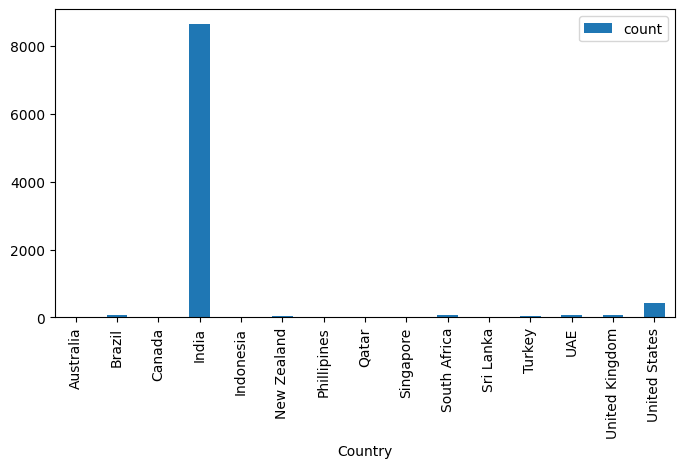

In [11]:
aggregated = food.groupby('Country')['Restaurant Name'].agg(['count']).plot(kind='bar', figsize=(8,4))
print(aggregated)

# #  number of Restaurant citywise

<Axes: >

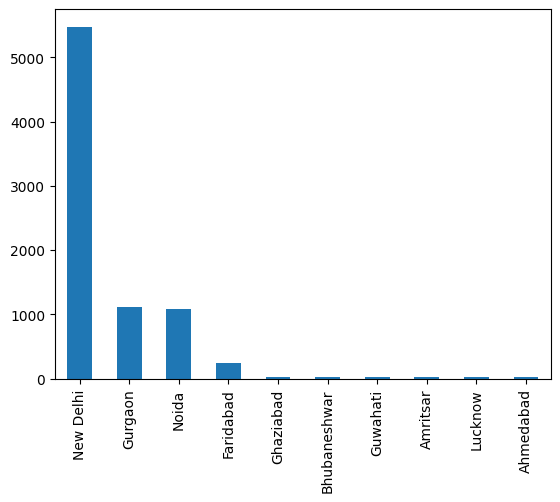

In [12]:
food['City'].value_counts().head(10).plot(kind='bar')

# # Rating of Restaurant

<Axes: >

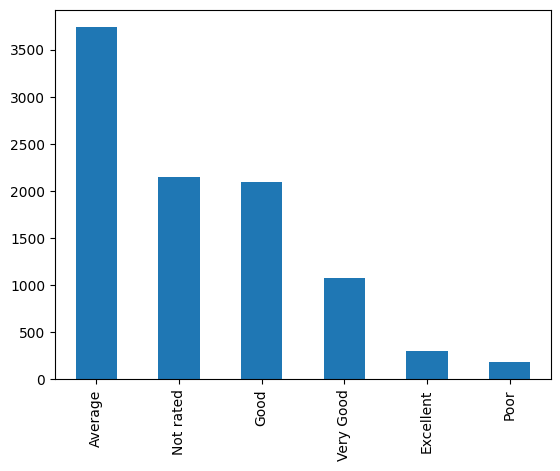

In [84]:
food['Rating text'].value_counts().plot(kind='bar')

In [19]:
food['Rating text'].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

# Rating Text

<Axes: ylabel='Rating text'>

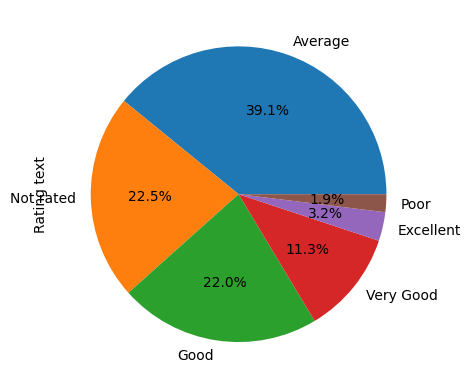

In [91]:
food['Rating text'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# # Maximum number of Restaurant

<Axes: >

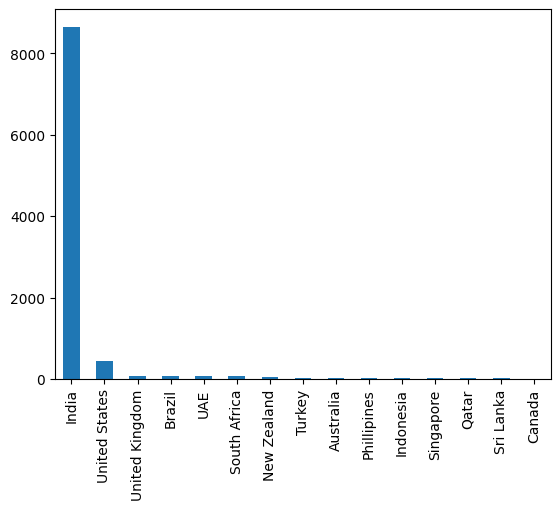

In [13]:
food['Country'].value_counts().head(60).plot(kind='bar')

In [14]:
food['Country'].value_counts().head(60)

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

# # Highest Rating Restaurant

In [56]:
highest_rating = food[food['Aggregate rating'] >= 4.9]


<Axes: >

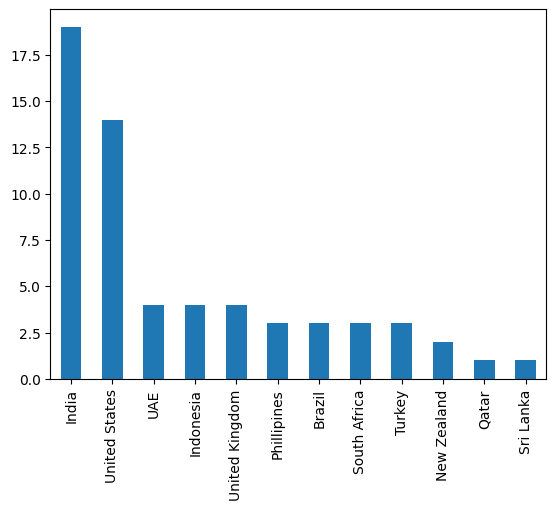

In [22]:
highest_rating['Country'].value_counts().plot(kind='bar')

# Price range vs Rating text

<Axes: xlabel='Price range'>

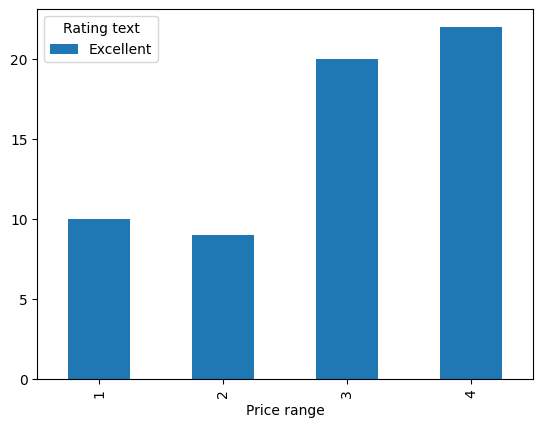

In [32]:
pd.crosstab(highest_rating['Price range'], highest_rating['Rating text']).plot(kind='bar')

# Lowest Rating Restaurant

In [17]:
lowest_rating = food[food['Aggregate rating'] == 0.0]
lowest_rating['Country'].value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

In [18]:
lowest_rating['Rating color'].value_counts()

White    2148
Name: Rating color, dtype: int64

<Axes: >

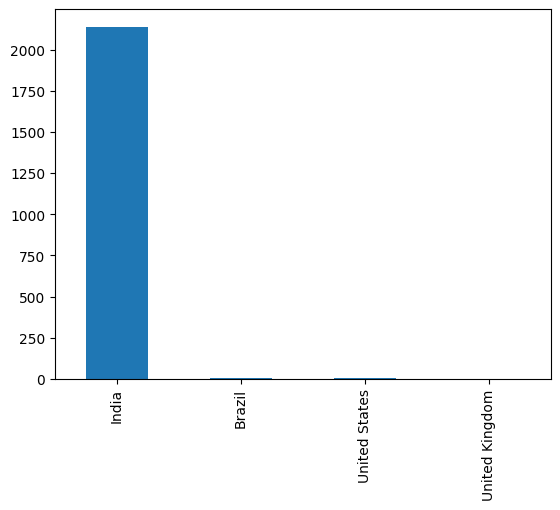

In [27]:
lowest_rating['Country'].value_counts().plot(kind='bar')

# Rating color

In [27]:
pd.crosstab(food['Rating color'], food['Aggregate rating'])

Aggregate rating,0.0,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,...,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
Rating color,,,,,,,,,,,,,,,,,,,,,
Dark Green,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,95,78,42,25,61
Green,0,0,0,0,0,0,0,0,0,0,...,266,274,221,174,144,0,0,0,0,0
Orange,0,0,0,0,0,0,0,0,110,191,...,0,0,0,0,0,0,0,0,0,0
Red,0,1,2,7,15,27,47,87,0,0,...,0,0,0,0,0,0,0,0,0,0
White,2148,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yellow,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Orange

In [30]:
Orange = food[food['Rating color']=='Orange']

<Axes: >

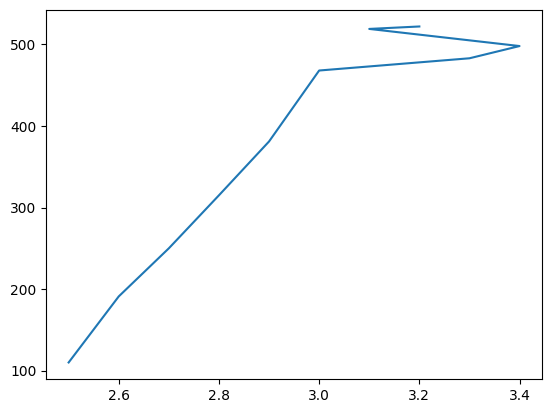

In [49]:
Orange['Aggregate rating'].value_counts().plot()

# Green

<Axes: >

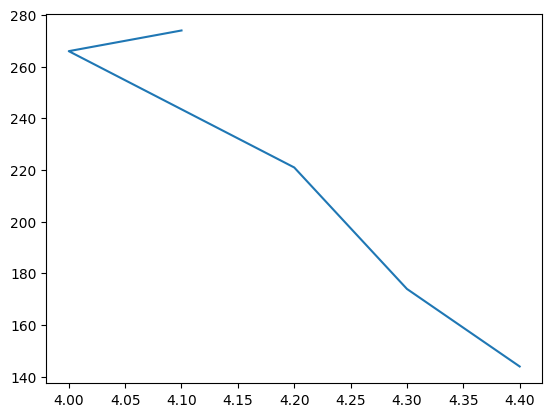

In [50]:
Green = food[food['Rating color']=='Green']
Green['Aggregate rating'].value_counts().plot()

# White

<Axes: ylabel='Frequency'>

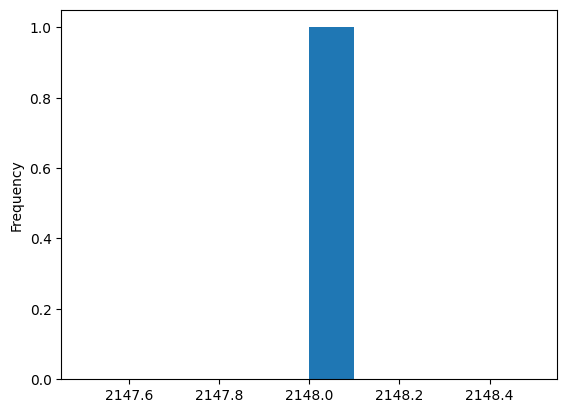

In [52]:
White = food[food['Rating color']=='White']
White['Aggregate rating'].value_counts().plot(kind='hist')

# Yellow

<Axes: >

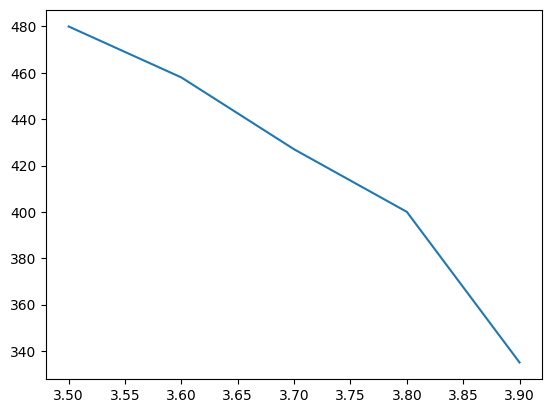

In [53]:
Yellow = food[food['Rating color']=='Yellow']
Yellow['Aggregate rating'].value_counts().plot()

# as you can see above-:

# Dark_Green - 4.5 and above
# Green -      4.0 to 4.4
# Yellow -     3.5 to 3.9
# Orange -     2.5 to 3.4
# Red -        1.8 to 2.4
# white -      0

# sepration of categorical and numerical columns

In [12]:
cate =[i for i in food.columns if food[i].dtype =='object']
categorical = food[cate]

num =[i for i in food.columns if food[i].dtype !='object']
numerical = food[num]

# Binary Encoder

In [14]:
import category_encoders as ce

In [15]:
columns = ['Currency', 'Has Table booking', 'Has Online delivery',
                     'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']

In [16]:
encoder = ce.BinaryEncoder(cols= columns)

In [17]:
encoded_data = encoder.fit_transform(categorical)

In [230]:
encoded_data

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency_0,Currency_1,Currency_2,Currency_3,...,Is delivering now_0,Is delivering now_1,Switch to order menu_0,Rating color_0,Rating color_1,Rating color_2,Rating text_0,Rating text_1,Rating text_2,Country
0,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",0,0,0,1,...,0,1,1,0,0,1,0,0,1,Phillipines
1,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,0,0,0,1,...,0,1,1,0,0,1,0,0,1,Phillipines
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",0,0,0,1,...,0,1,1,0,1,0,0,1,0,Phillipines
3,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",0,0,0,1,...,0,1,1,0,0,1,0,0,1,Phillipines
4,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",0,0,0,1,...,0,1,1,0,0,1,0,0,1,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,NamlÛ± Gurme,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",Turkish,1,1,0,0,...,0,1,1,0,1,0,0,1,0,Turkey
9547,Ceviz AÛôacÛ±,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul","World Cuisine, Patisserie, Cafe",1,1,0,0,...,0,1,1,0,1,0,0,1,0,Turkey
9548,Huqqa,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul","Italian, World Cuisine",1,1,0,0,...,0,1,1,0,1,1,0,1,1,Turkey
9549,Aôôk Kahve,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",Restaurant Cafe,1,1,0,0,...,0,1,1,0,1,0,0,1,0,Turkey


# Label Encoder

In [18]:
le = LabelEncoder()

In [19]:
for i in encoded_data.columns:
    if encoded_data[i].dtype =='object':
        encoded_data[i] = le.fit_transform(encoded_data[i])

In [20]:
encoded_data

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency_0,Currency_1,Currency_2,Currency_3,...,Is delivering now_0,Is delivering now_1,Switch to order menu_0,Rating color_0,Rating color_1,Rating color_2,Rating text_0,Rating text_1,Rating text_2,Country
0,3749,73,8685,171,172,920,0,0,0,1,...,0,1,1,0,0,1,0,0,1,6
1,3173,73,6055,593,601,1111,0,0,0,1,...,0,1,1,0,0,1,0,0,1,6
2,2897,75,4684,308,314,1671,0,0,0,1,...,0,1,1,0,1,0,0,1,0,6
3,4707,75,8690,862,875,1126,0,0,0,1,...,0,1,1,0,0,1,0,0,1,6
4,5523,75,8689,862,875,1122,0,0,0,1,...,0,1,1,0,0,1,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4443,140,5926,517,523,1813,1,1,0,0,...,0,1,1,0,1,0,0,1,0,11
9547,1311,140,5962,552,558,1824,1,1,0,0,...,0,1,1,0,1,0,0,1,0,11
9548,3069,140,5966,554,561,1110,1,1,0,0,...,0,1,1,0,1,1,0,1,1,11
9549,513,140,5967,554,561,1657,1,1,0,0,...,0,1,1,0,1,0,0,1,0,11


# merging of encoded and numerical

In [21]:
final1 = pd.merge(numerical, encoded_data, left_index=True, right_index=True)

In [22]:
final1

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Restaurant Name,City,...,Is delivering now_0,Is delivering now_1,Switch to order menu_0,Rating color_0,Rating color_1,Rating color_2,Rating text_0,Rating text_1,Rating text_2,Country
0,6317637,162,121.027535,14.565443,1100,3,4.8,314,3749,73,...,0,1,1,0,0,1,0,0,1,6
1,6304287,162,121.014101,14.553708,1200,3,4.5,591,3173,73,...,0,1,1,0,0,1,0,0,1,6
2,6300002,162,121.056831,14.581404,4000,4,4.4,270,2897,75,...,0,1,1,0,1,0,0,1,0,6
3,6318506,162,121.056475,14.585318,1500,4,4.9,365,4707,75,...,0,1,1,0,0,1,0,0,1,6
4,6314302,162,121.057508,14.584450,1500,4,4.8,229,5523,75,...,0,1,1,0,0,1,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,208,28.977392,41.022793,80,3,4.1,788,4443,140,...,0,1,1,0,1,0,0,1,0,11
9547,5908749,208,29.041297,41.009847,105,3,4.2,1034,1311,140,...,0,1,1,0,1,0,0,1,0,11
9548,5915807,208,29.034640,41.055817,170,4,3.7,661,3069,140,...,0,1,1,0,1,1,0,1,1,11
9549,5916112,208,29.036019,41.057979,120,4,4.0,901,513,140,...,0,1,1,0,1,0,0,1,0,11


# Outlier detection and removal

In [23]:
mean = np.mean(final1)
std = np.std(final1)
threshold = 3
z_scores = (final1 - mean) / std

C:\Users\ravin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [24]:
outliers = final1[np.abs(z_scores) > threshold]
df = final1[~final1.isin(outliers)].dropna()

In [25]:
df

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Restaurant Name,City,...,Is delivering now_0,Is delivering now_1,Switch to order menu_0,Rating color_0,Rating color_1,Rating color_2,Rating text_0,Rating text_1,Rating text_2,Country
706,2500023,1.0,75.346017,19.876219,800.0,3,3.6,240.0,3585,11.0,...,0.0,1.0,1,0,1,1,0,1,1,3.0
707,2500076,1.0,0.000000,0.000000,850.0,3,3.3,65.0,617,11.0,...,0.0,1.0,1,1,0,0,1,0,0,3.0
708,2500054,1.0,75.353942,19.874733,600.0,2,3.3,63.0,354,11.0,...,0.0,1.0,1,1,0,0,1,0,0,3.0
709,2500134,1.0,75.340775,19.876106,700.0,2,3.1,19.0,2099,11.0,...,0.0,1.0,1,1,0,0,1,0,0,3.0
710,2500069,1.0,75.367127,19.875522,350.0,2,3.4,46.0,3010,11.0,...,0.0,1.0,1,1,0,0,1,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,2800100,1.0,83.361377,17.764287,600.0,2,3.6,193.0,1834,134.0,...,0.0,1.0,1,0,1,1,0,1,1,3.0
9272,2800418,1.0,0.000000,0.000000,400.0,2,3.7,85.0,3364,134.0,...,0.0,1.0,1,0,1,1,0,1,1,3.0
9273,2800881,1.0,83.315281,17.719539,600.0,2,4.3,172.0,4988,134.0,...,0.0,1.0,1,0,1,0,0,1,0,3.0
9274,2800042,1.0,83.336840,17.721182,1500.0,4,3.8,74.0,7201,134.0,...,0.0,1.0,1,0,1,1,0,1,1,3.0


# Loss of Information

In [26]:
1164 / 9551 *100

12.187205528216941

In [27]:


x = df.drop(['Average Cost for two'], axis=1)
y = df['Average Cost for two']

# Relationship between input and output

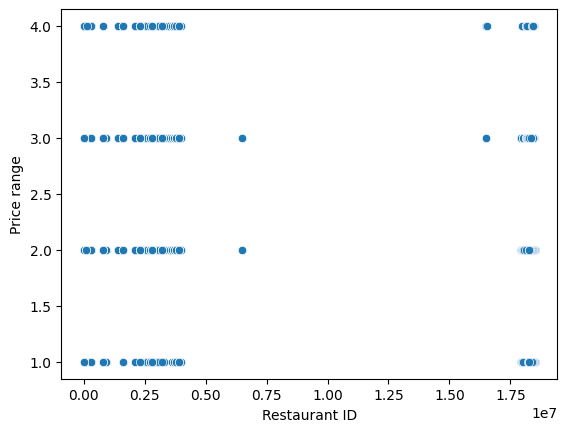

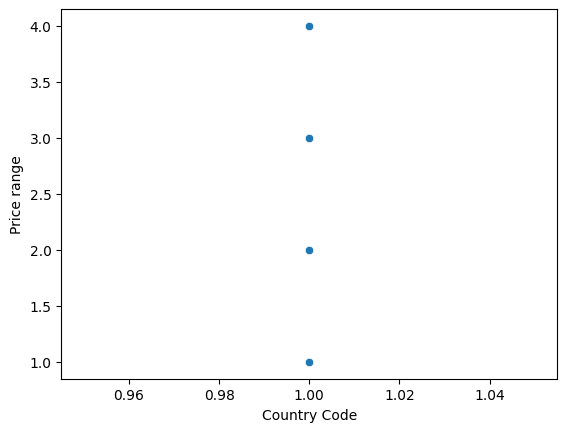

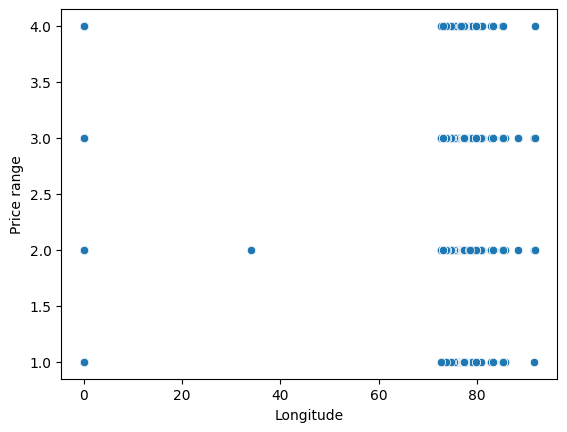

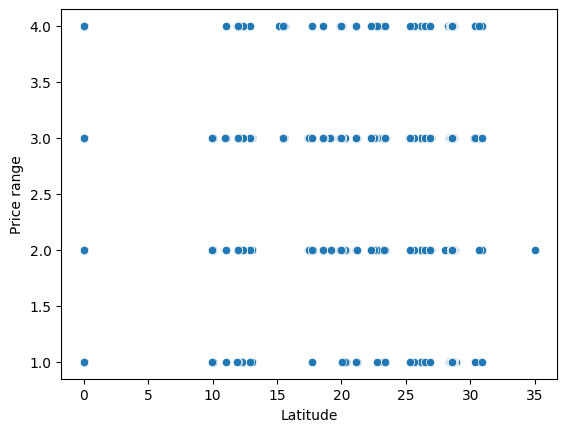

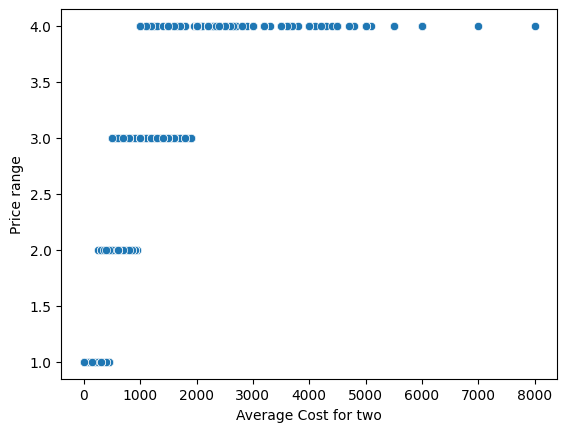

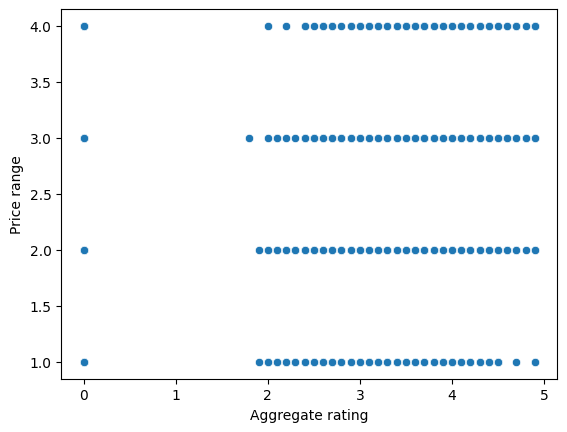

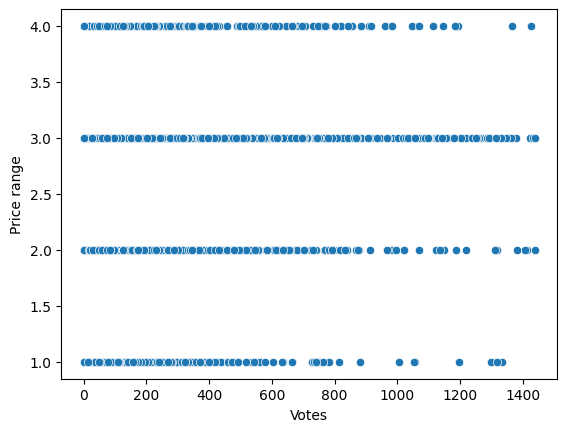

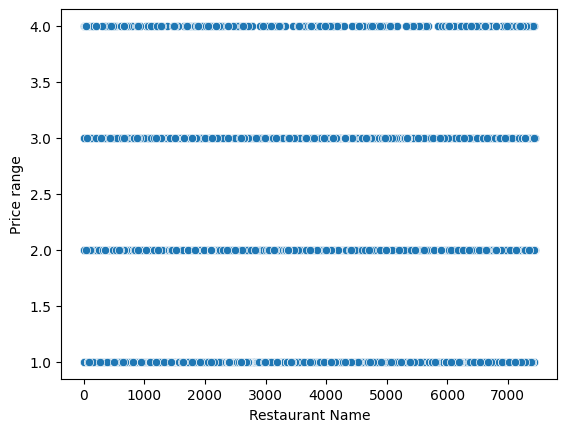

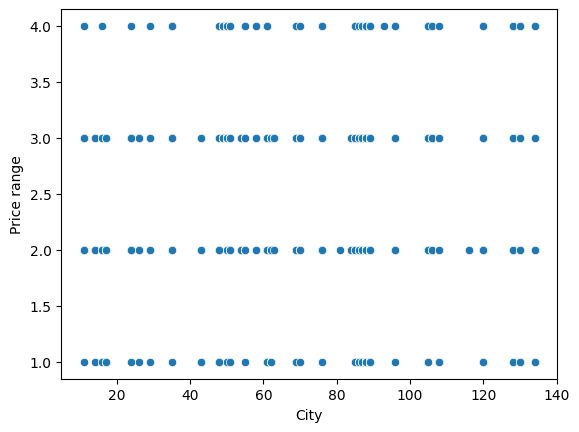

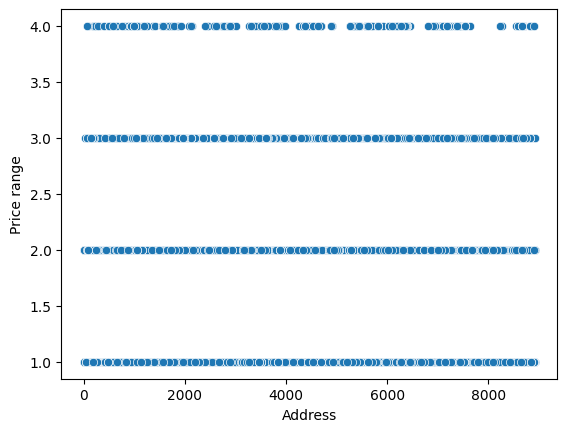

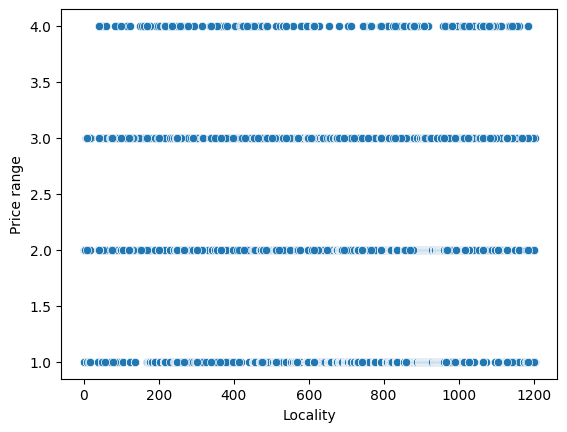

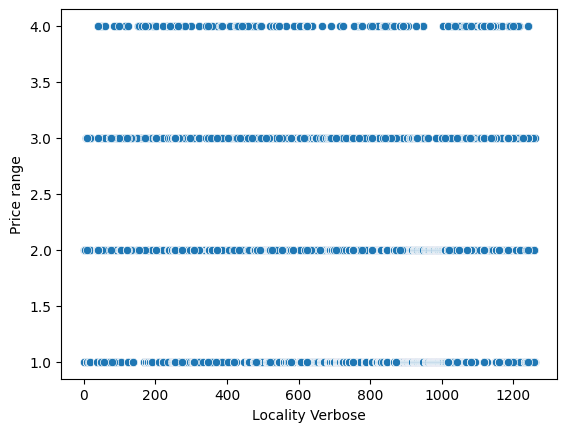

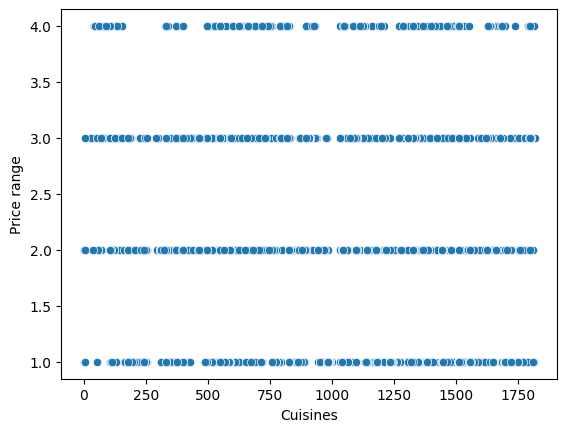

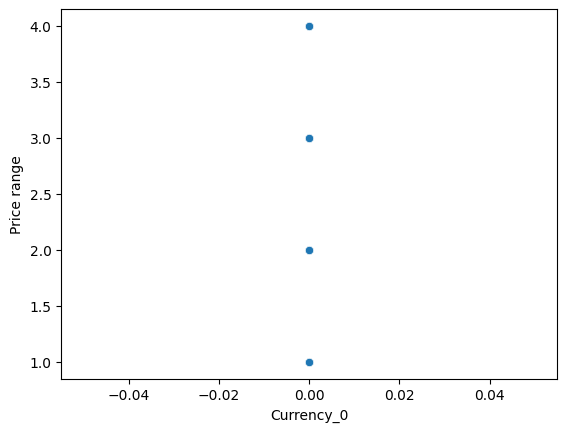

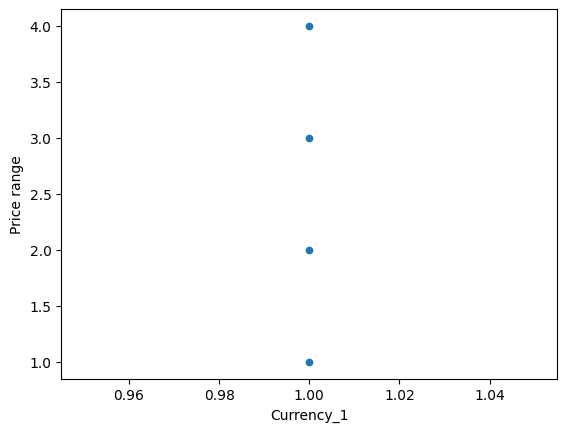

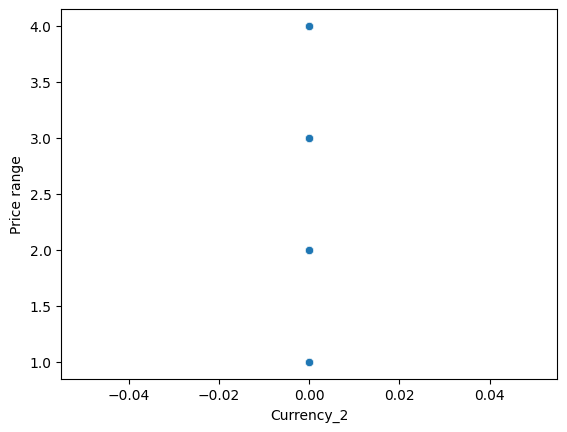

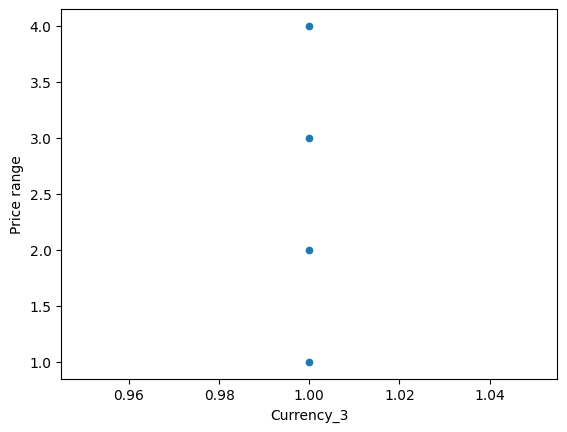

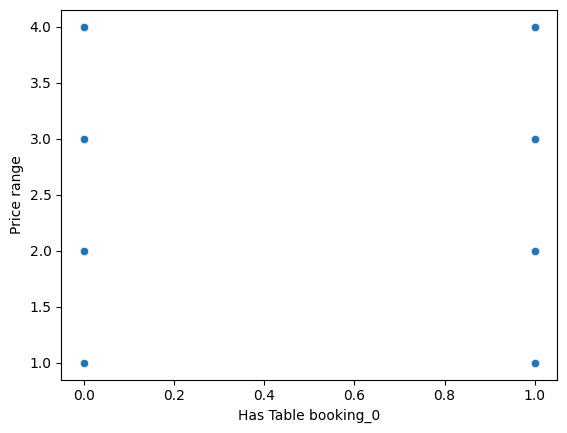

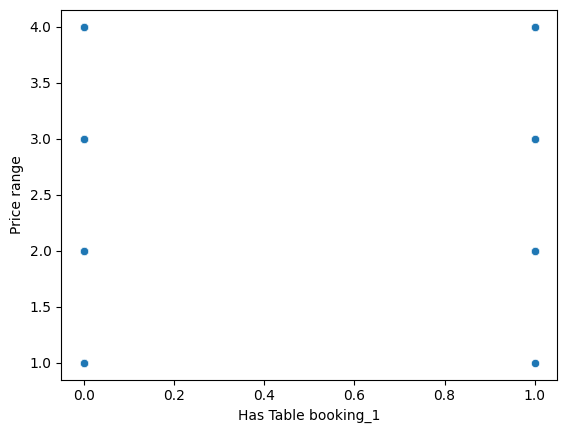

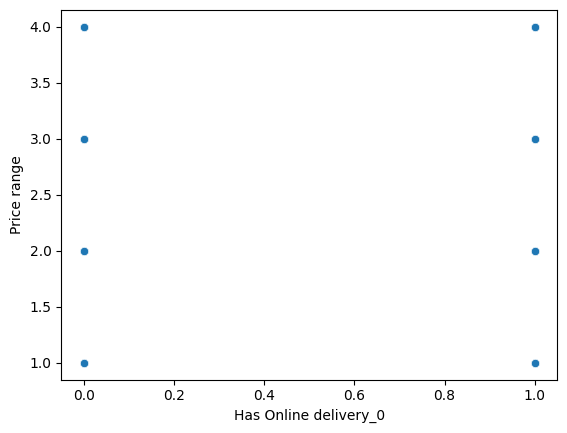

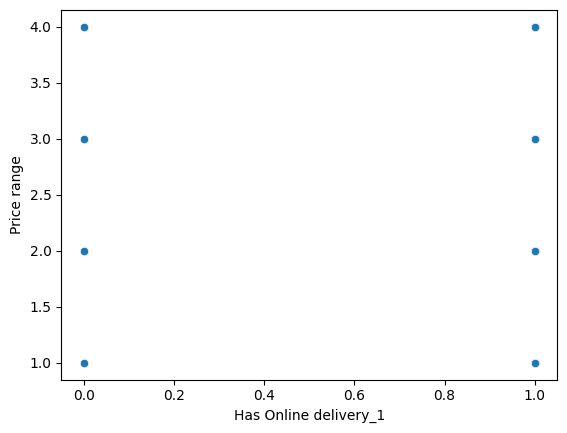

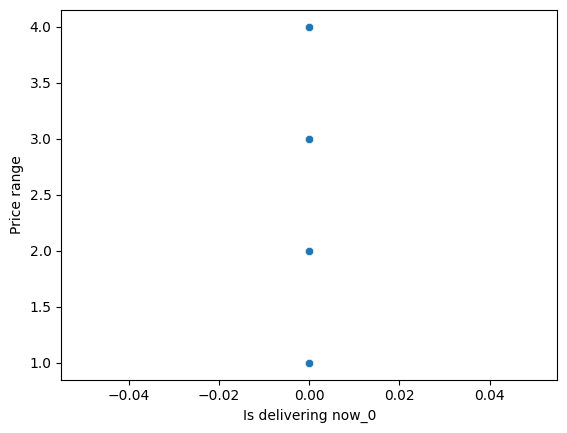

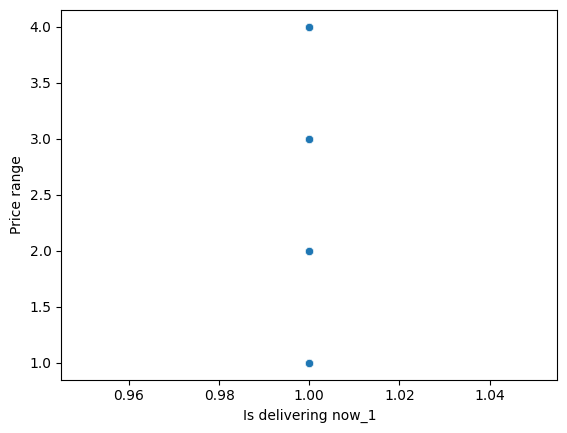

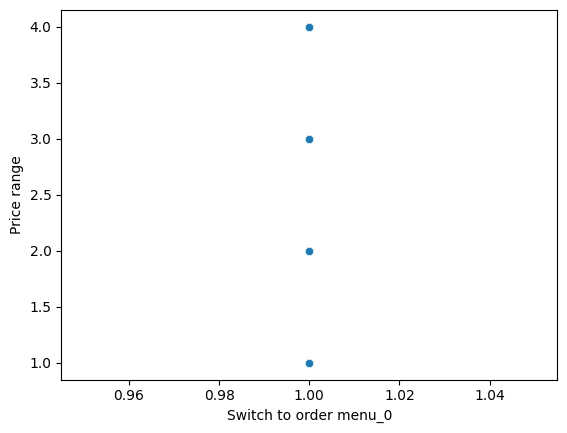

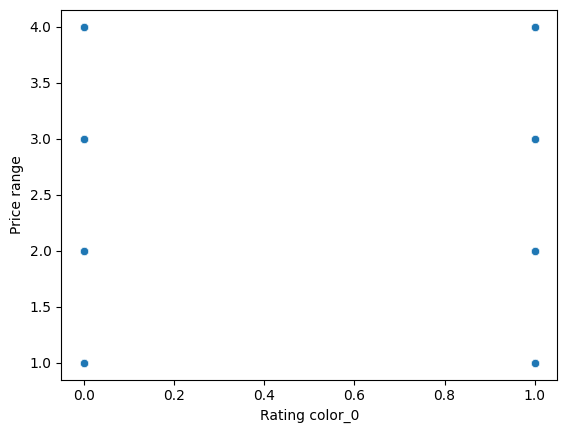

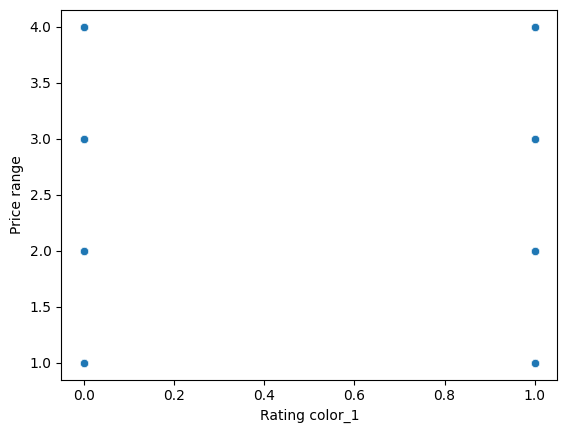

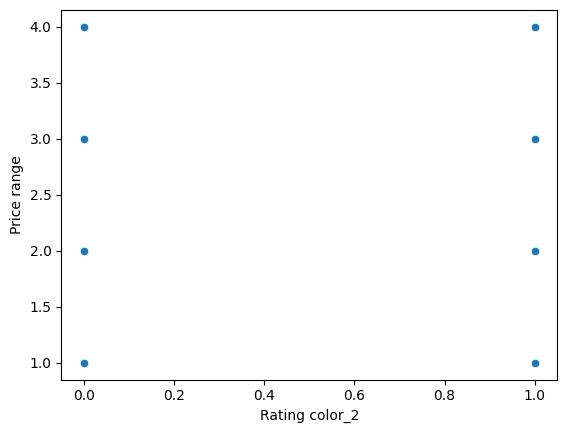

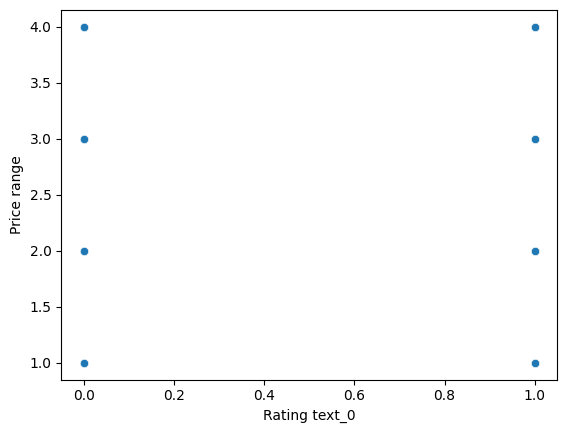

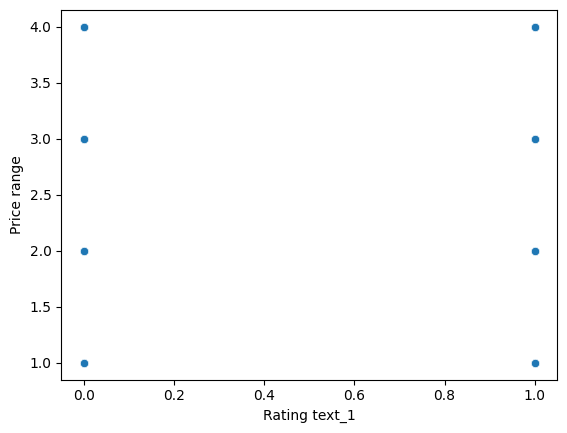

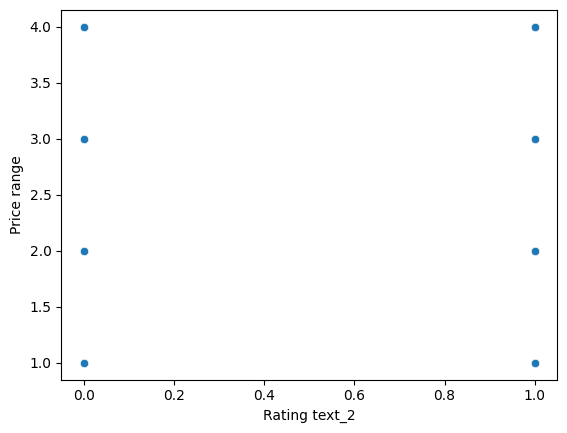

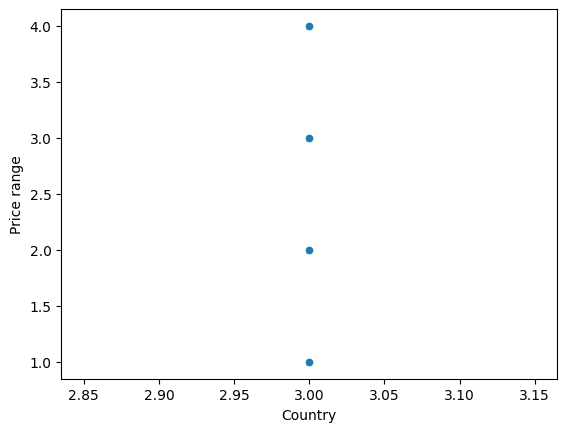

In [153]:
for i in x.columns:
    sns.scatterplot(data=x, x=i, y=y)
    plt.show()
    

# DIstribution of data

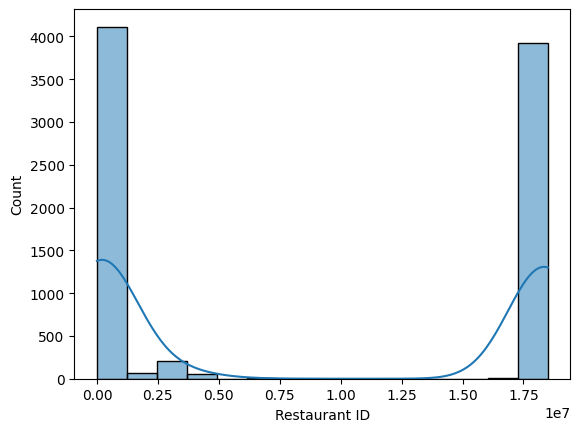

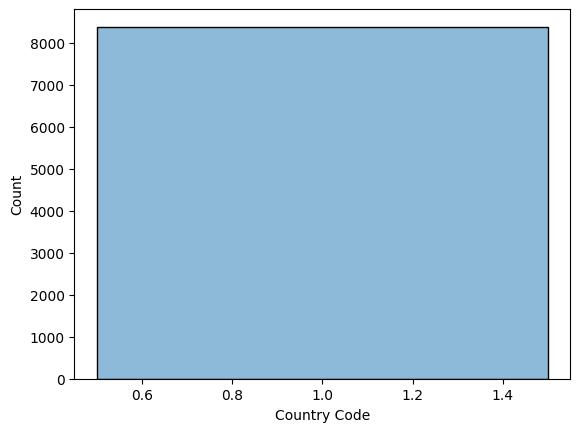

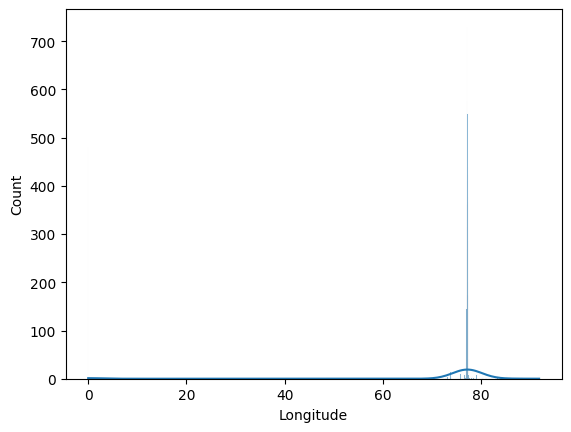

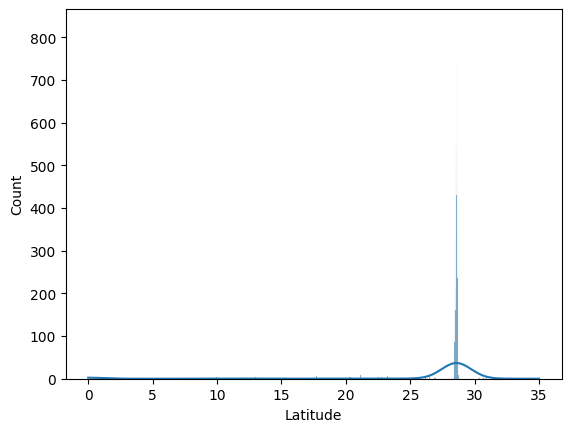

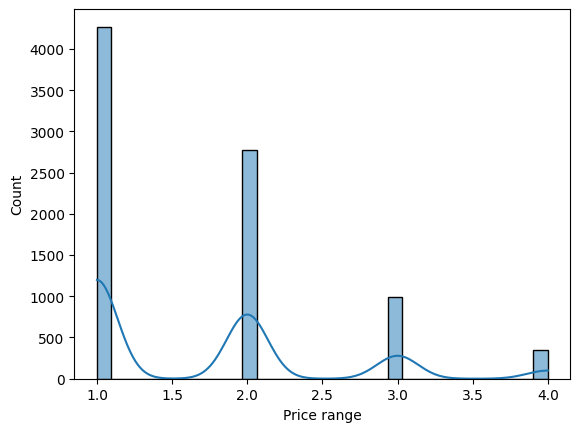

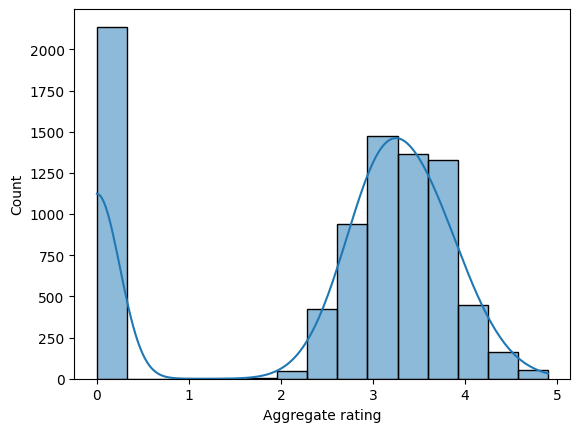

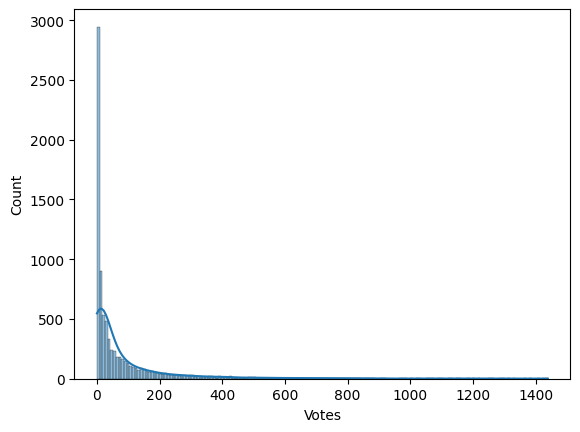

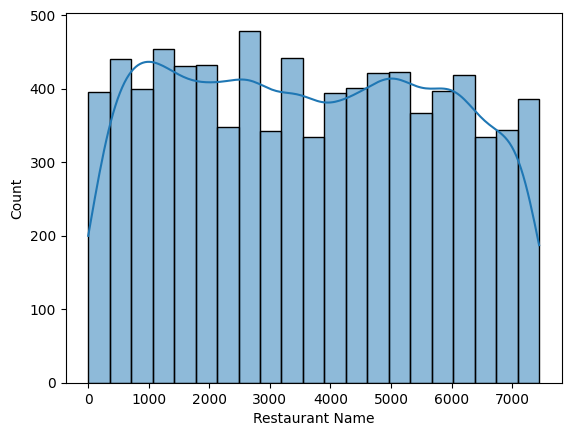

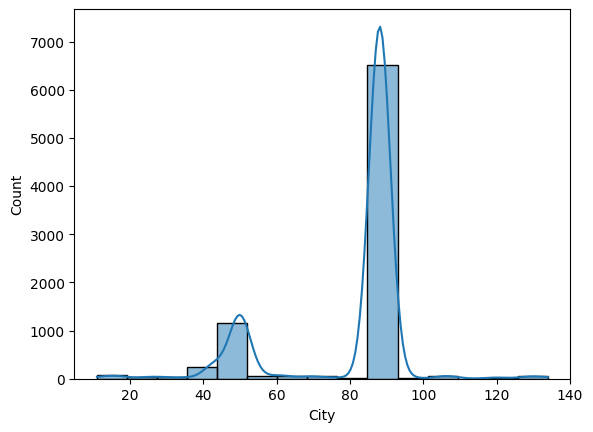

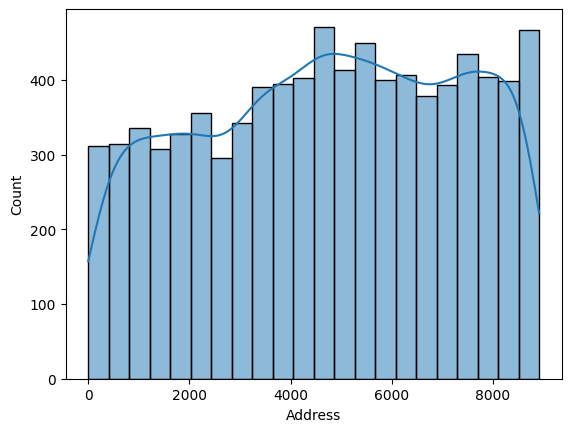

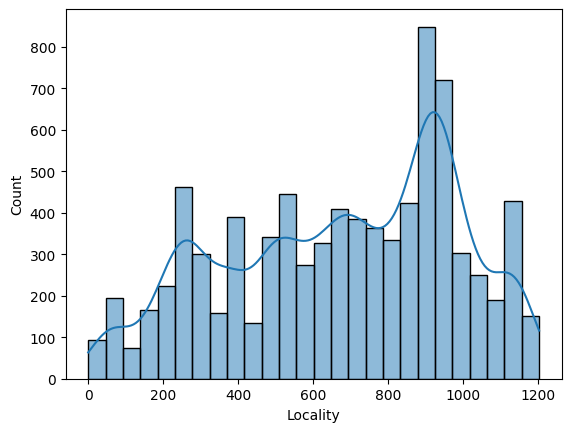

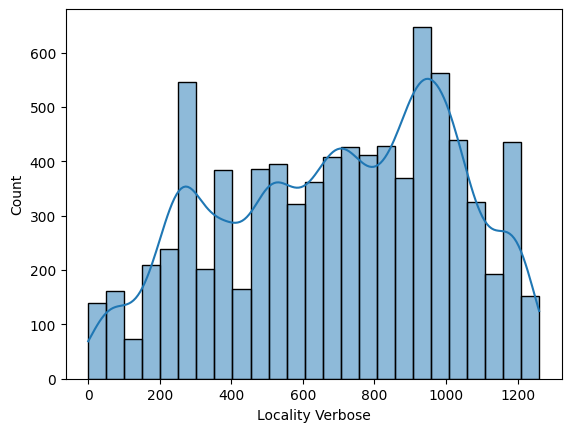

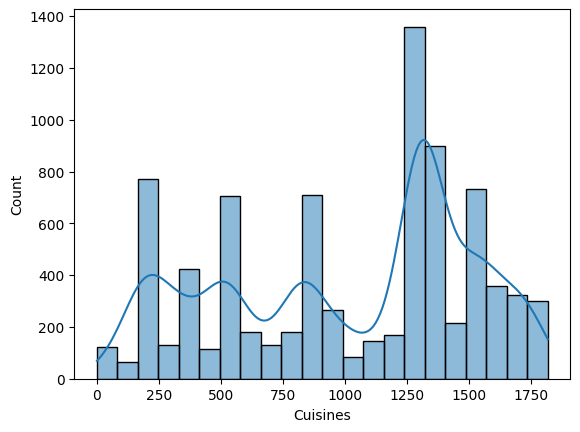

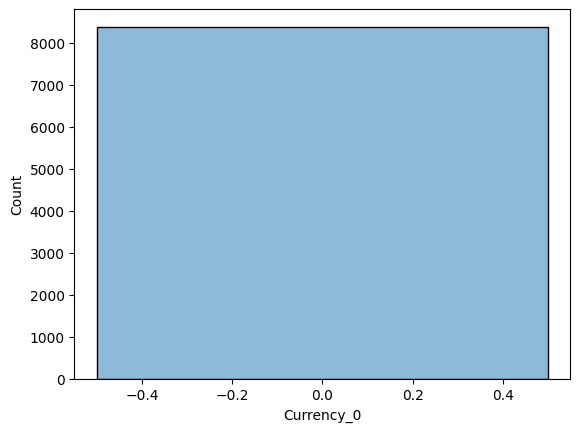

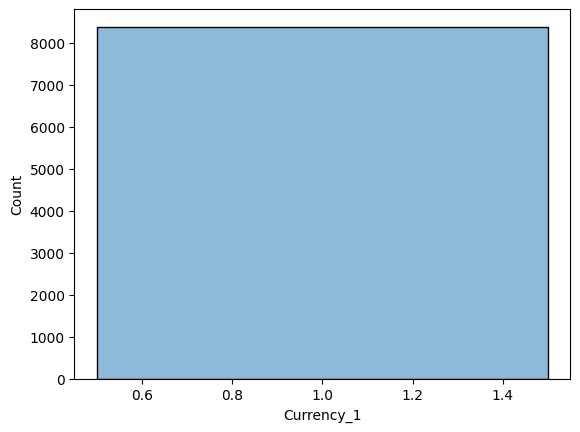

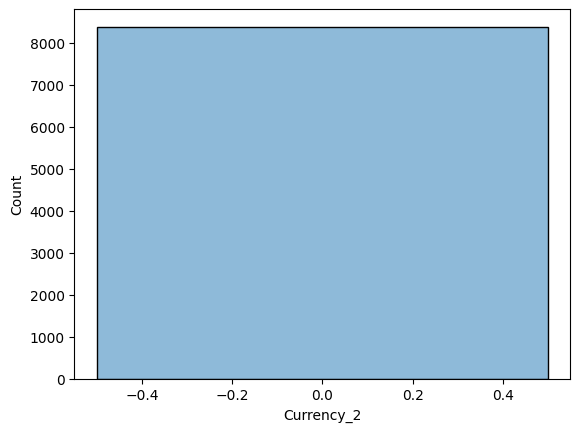

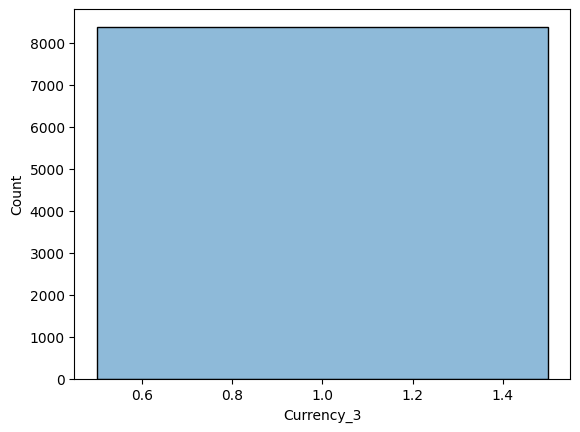

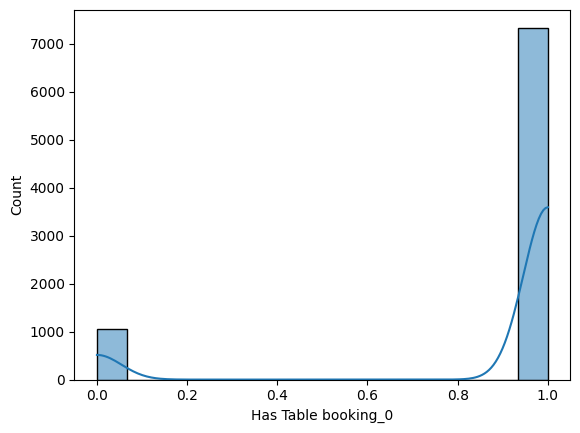

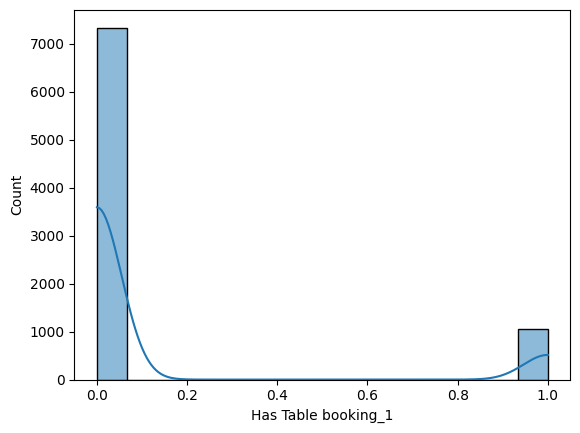

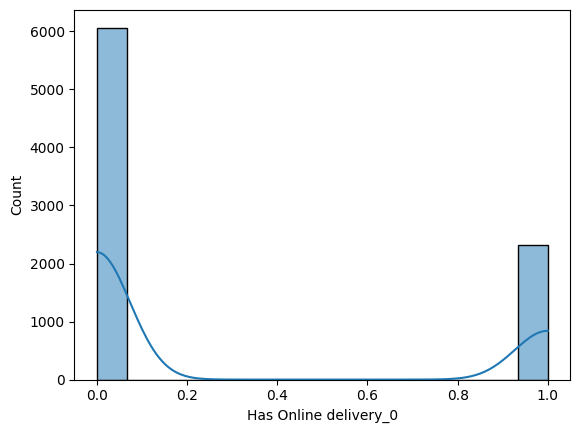

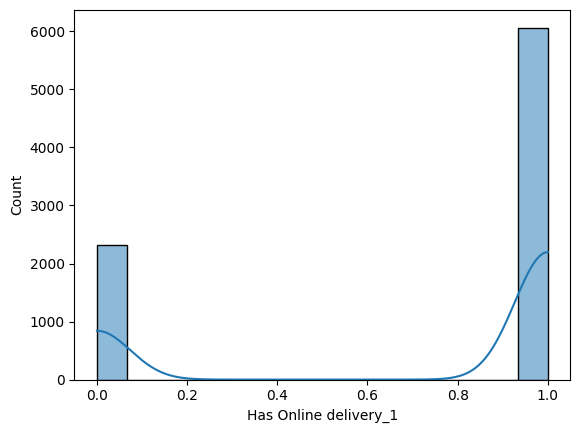

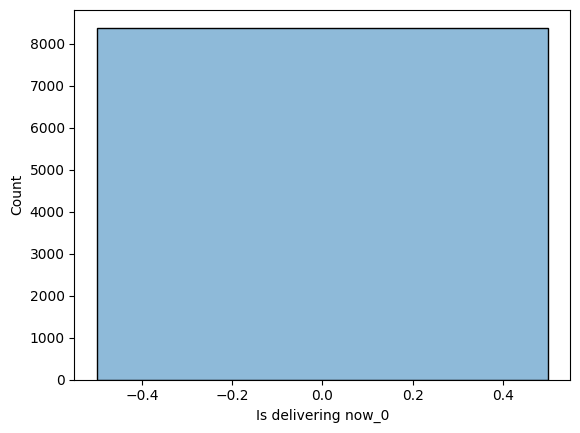

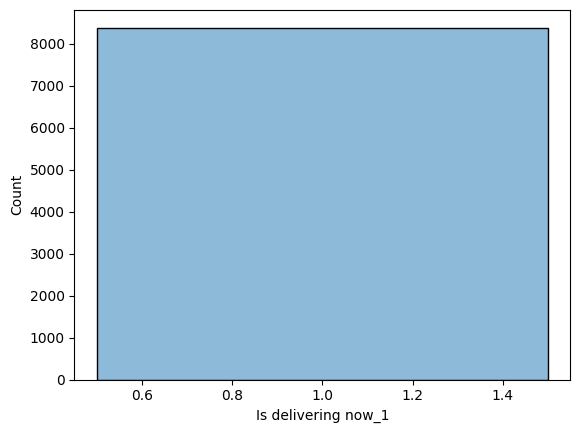

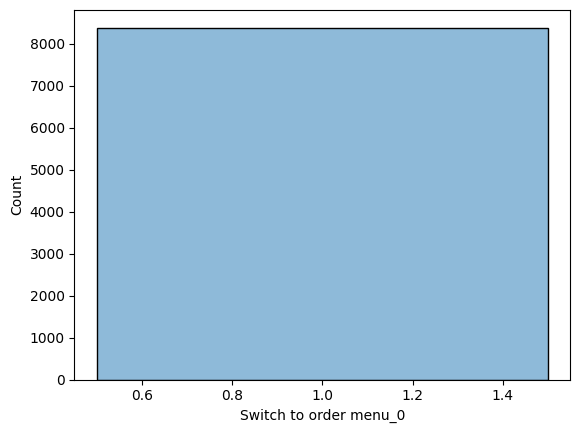

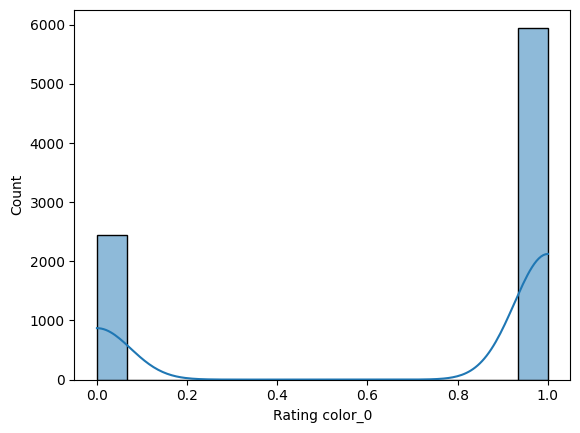

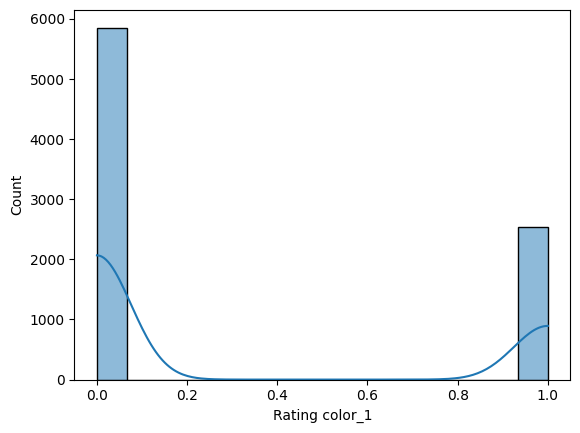

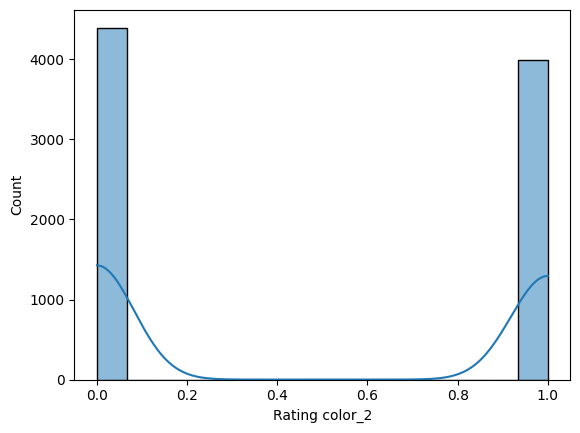

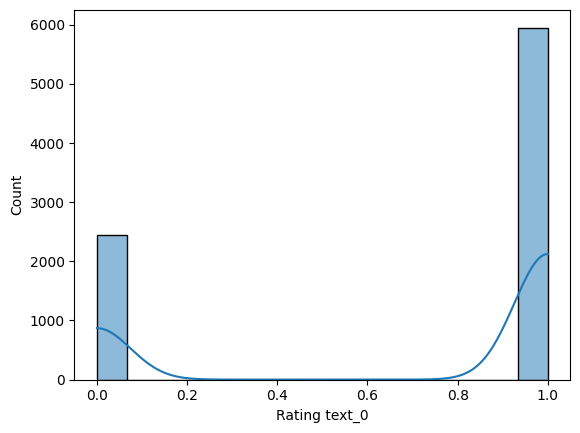

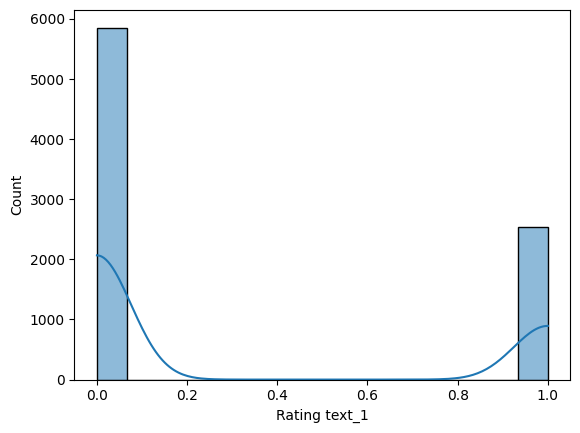

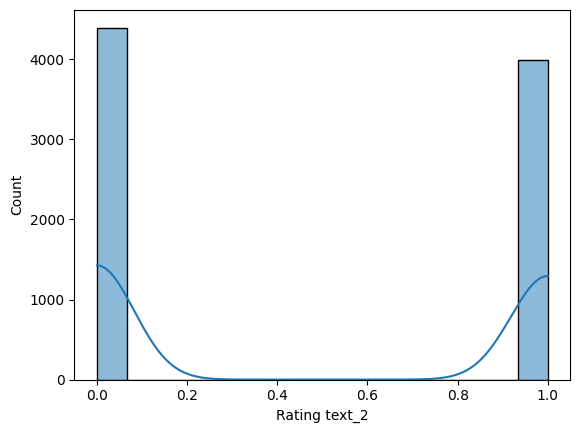

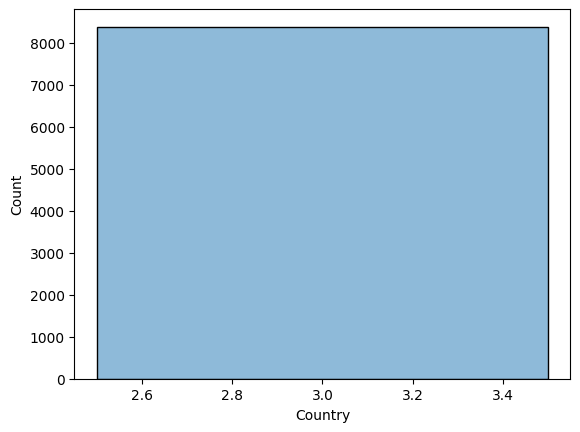

In [28]:
for i in x.columns:
    if x[i].dtype !='object':
        sns.histplot(data=x, x=i, kde=True)
        plt.show()
 

# Transformation

In [29]:
qt = PowerTransformer()

In [30]:
transformed = pd.DataFrame(qt.fit_transform(x))

C:\Users\ravin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [31]:
transformed

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.122633,0.0,-0.131746,-2.411833,1.408968,0.772467,1.281867,0.088133,-2.304218,-1.475493,...,0.0,0.0,0.0,-1.562990,1.521088,1.049764,-1.562990,1.521088,1.049764,0.0
1,0.122641,0.0,-3.914012,-3.259851,1.408968,0.500394,0.596165,-1.527129,-2.304218,1.081249,...,0.0,0.0,0.0,0.639799,-0.657424,-0.952595,0.639799,-0.657424,-0.952595,0.0
2,0.122637,0.0,-0.130308,-2.412082,0.733207,0.500394,0.579970,-1.747229,-2.304218,1.074664,...,0.0,0.0,0.0,0.639799,-0.657424,-0.952595,0.639799,-0.657424,-0.952595,0.0
3,0.122649,0.0,-0.132697,-2.411852,0.733207,0.325902,-0.028898,-0.618141,-2.304218,-0.660313,...,0.0,0.0,0.0,0.639799,-0.657424,-0.952595,0.639799,-0.657424,-0.952595,0.0
4,0.122640,0.0,-0.127914,-2.411950,0.733207,0.589718,0.417736,-0.171310,-2.304218,0.281995,...,0.0,0.0,0.0,0.639799,-0.657424,-0.952595,0.639799,-0.657424,-0.952595,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8382,0.165047,0.0,1.538132,-2.714322,0.733207,0.772467,1.166452,-0.759198,5.816561,-0.259370,...,0.0,0.0,0.0,-1.562990,1.521088,1.049764,-1.562990,1.521088,1.049764,0.0
8383,0.165090,0.0,-3.914012,-3.259851,0.733207,0.865874,0.735654,-0.009883,5.816561,0.917746,...,0.0,0.0,0.0,-1.562990,1.521088,1.049764,-1.562990,1.521088,1.049764,0.0
8384,0.165152,0.0,1.527228,-2.719683,0.733207,1.454167,1.105592,0.670973,5.816561,0.897733,...,0.0,0.0,0.0,-1.562990,1.521088,-0.952595,-1.562990,1.521088,-0.952595,0.0
8385,0.165039,0.0,1.532326,-2.719487,1.754708,0.960622,0.663490,1.492698,5.816561,1.466977,...,0.0,0.0,0.0,-1.562990,1.521088,1.049764,-1.562990,1.521088,1.049764,0.0


# DISTRIBUTION AFTER TRANSFORMATION

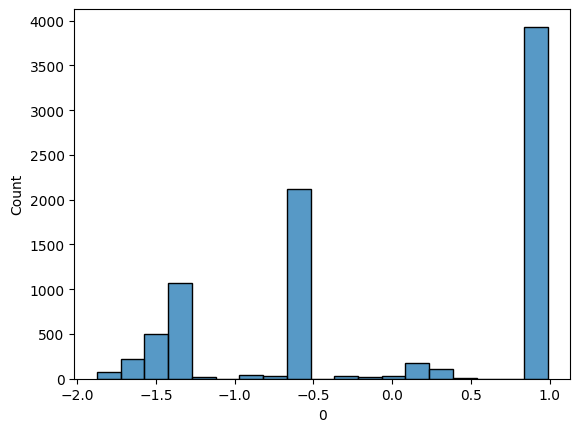

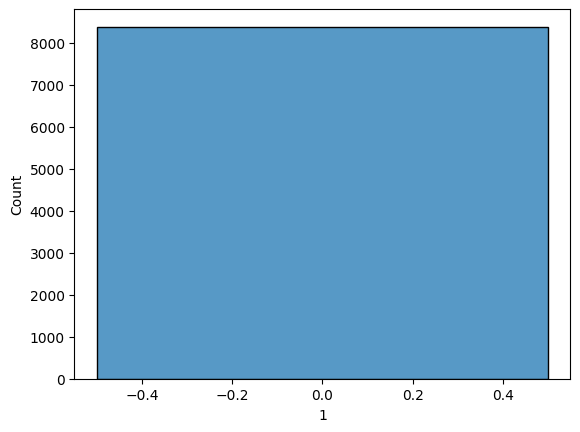

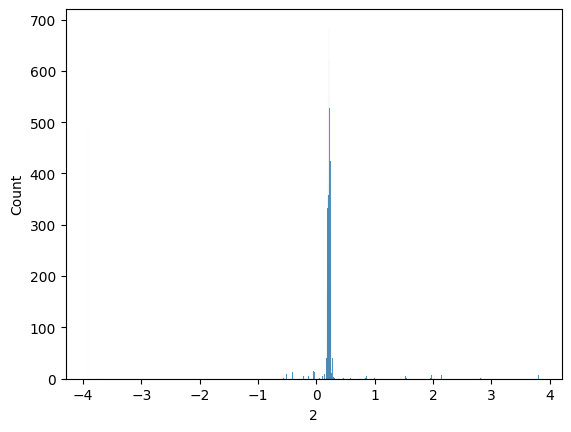

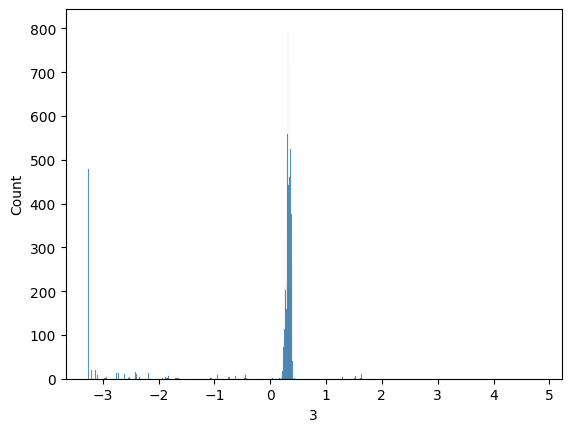

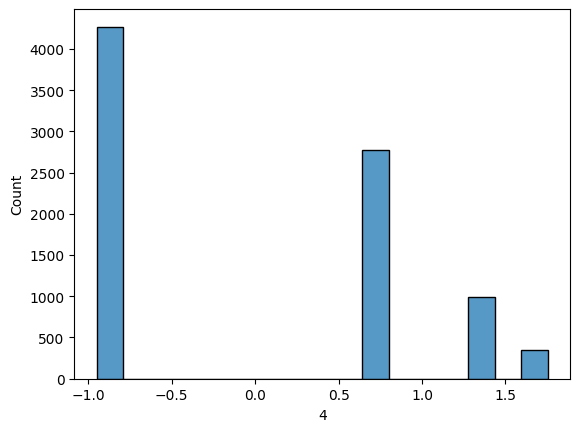

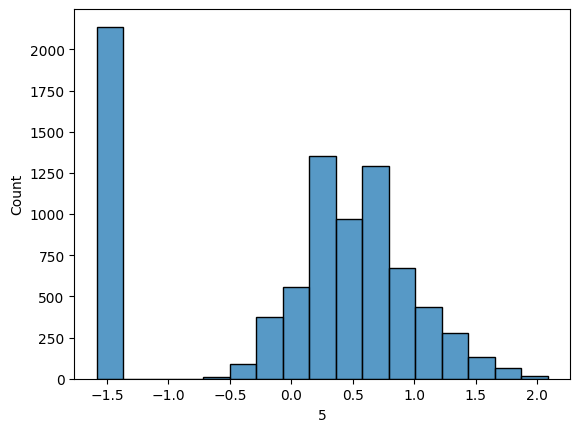

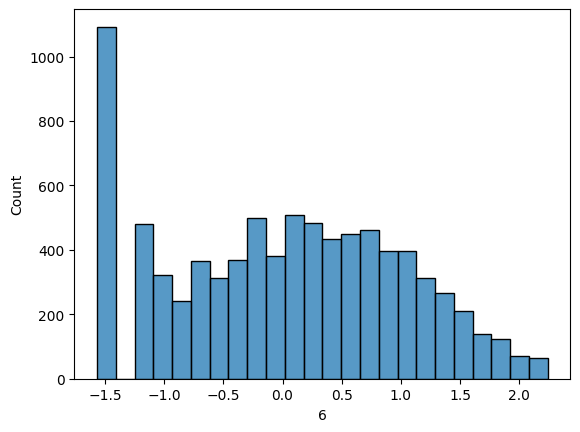

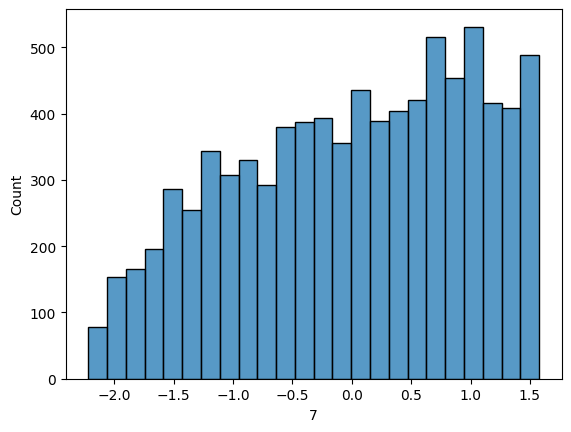

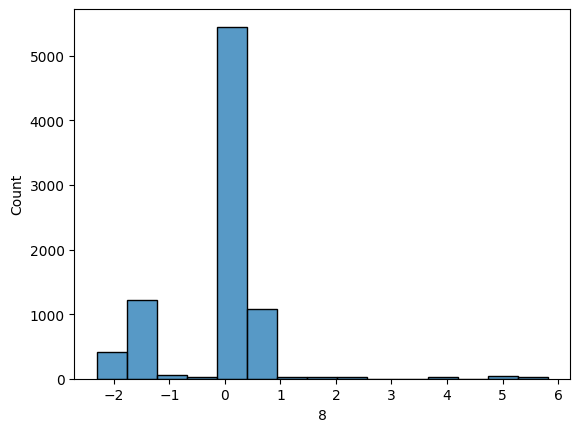

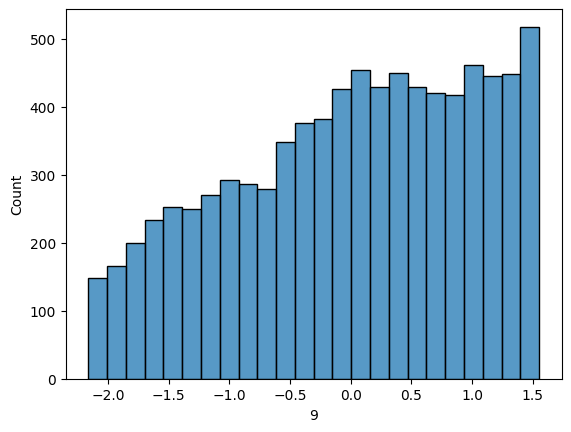

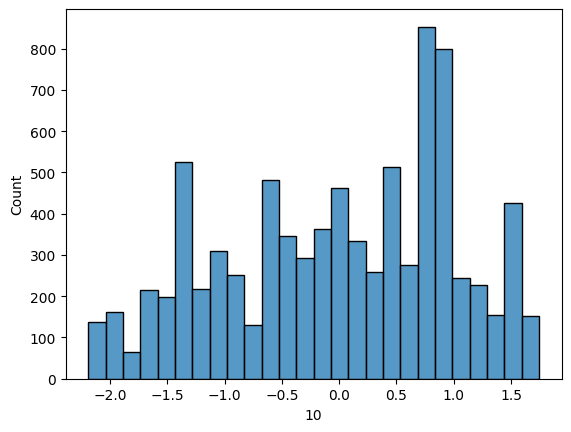

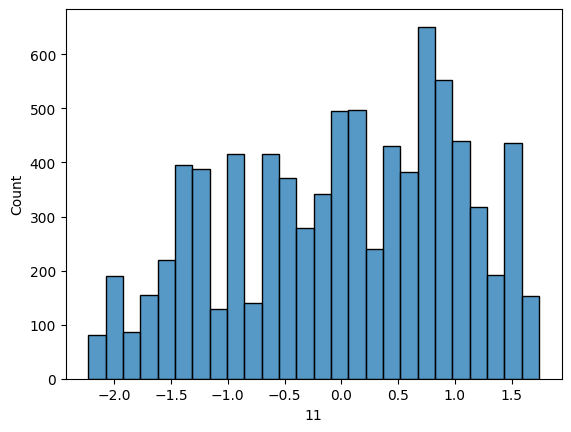

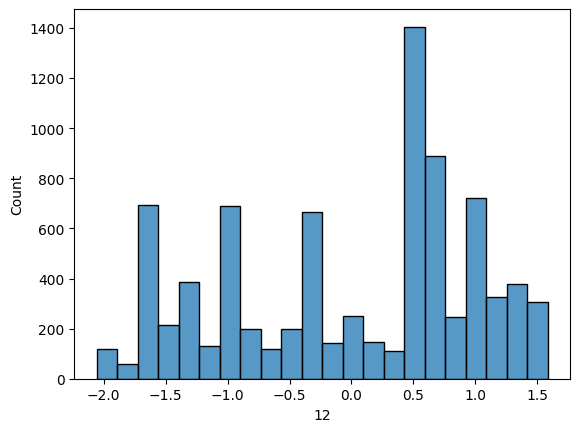

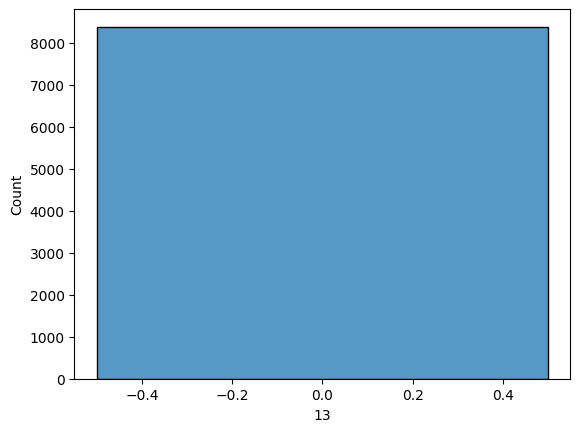

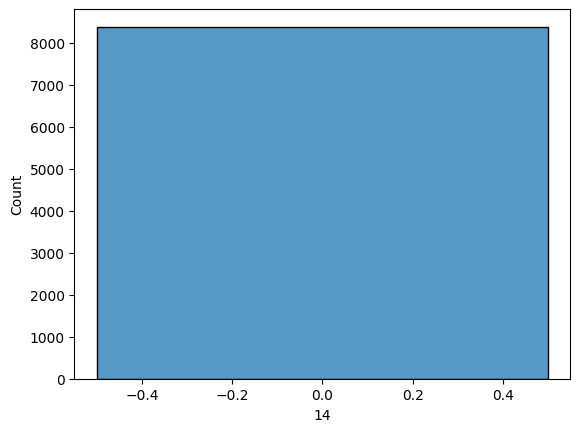

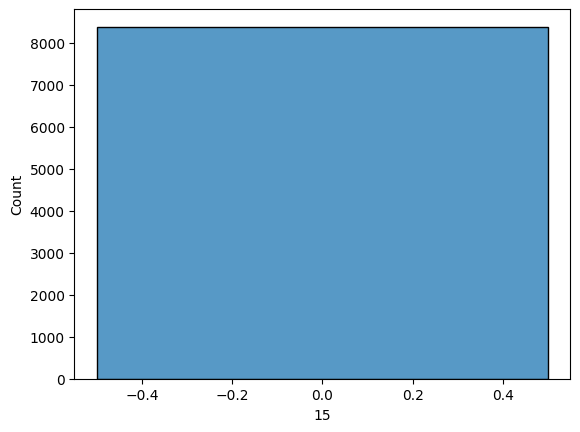

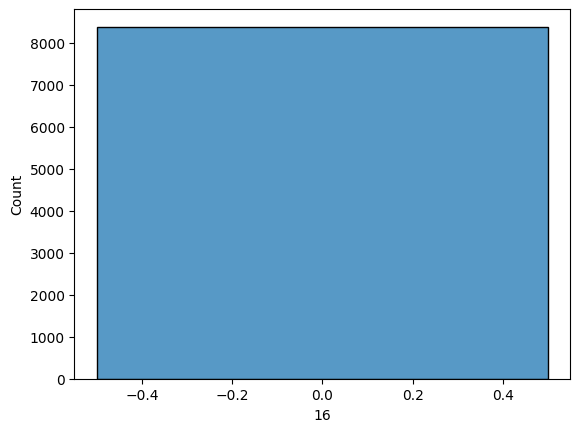

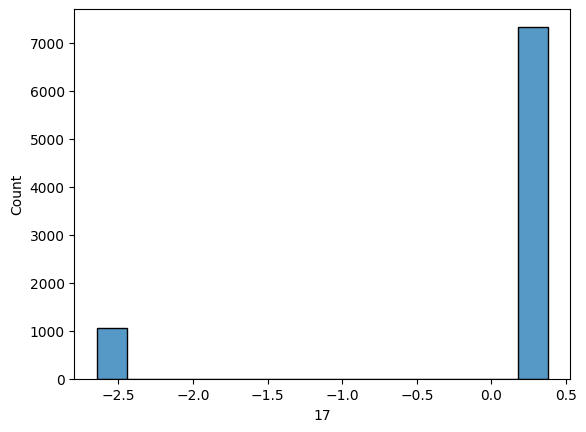

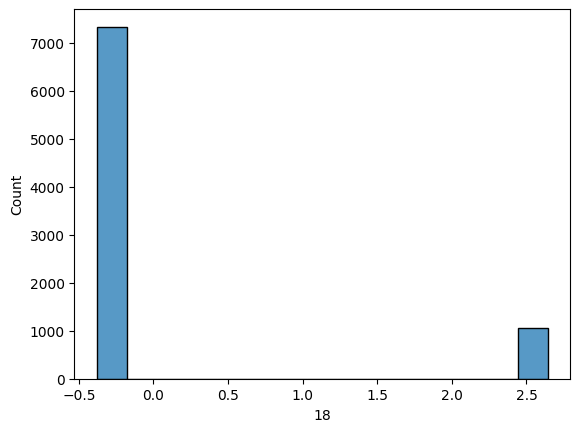

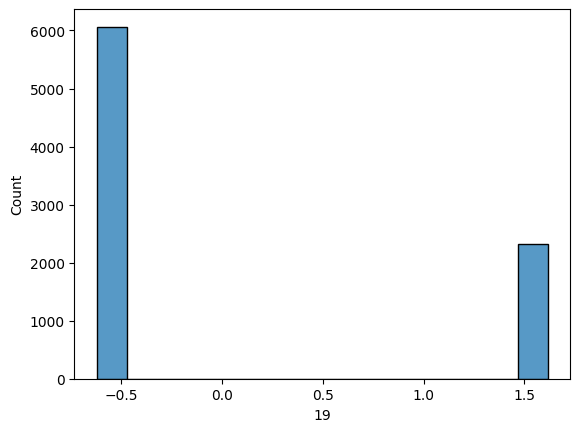

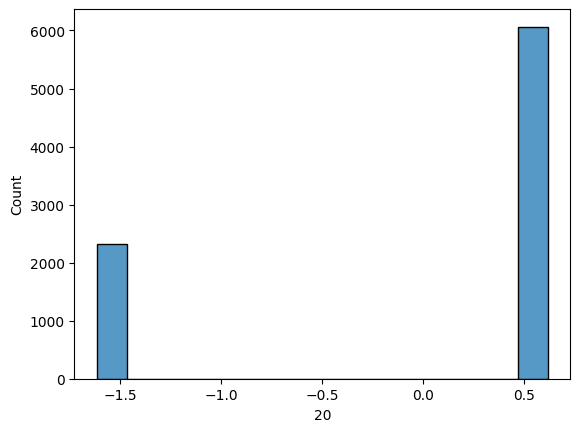

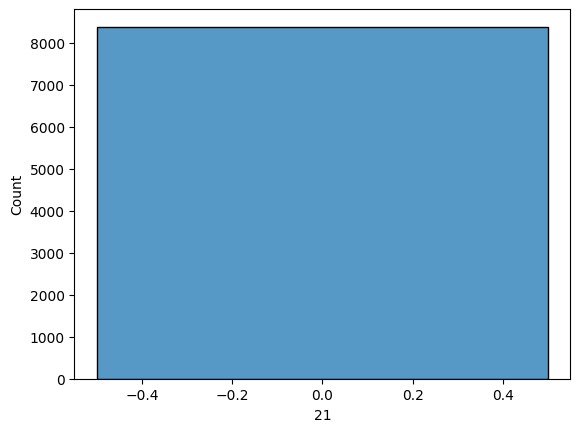

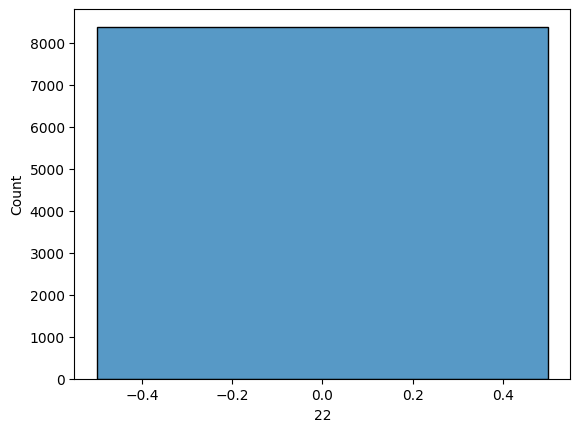

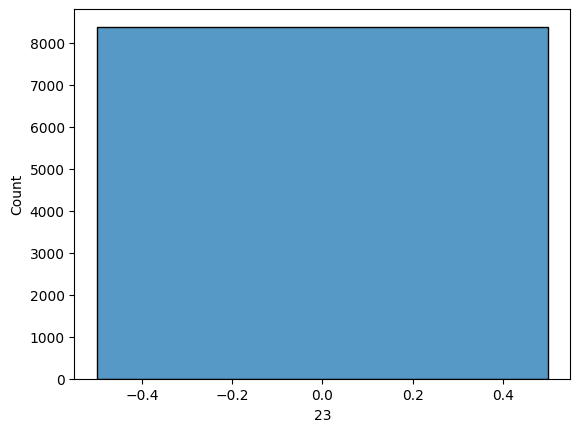

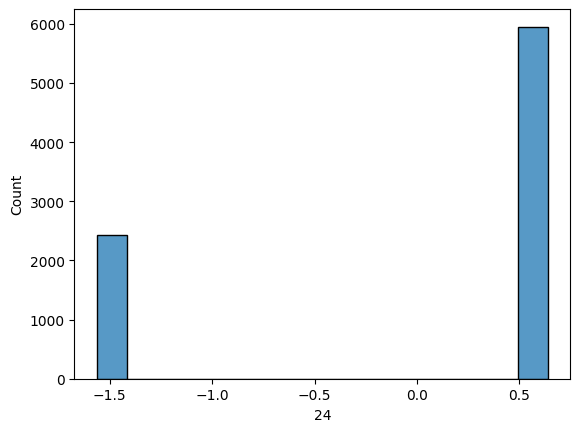

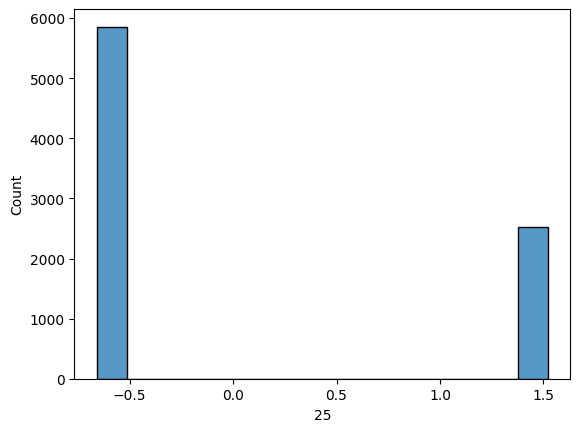

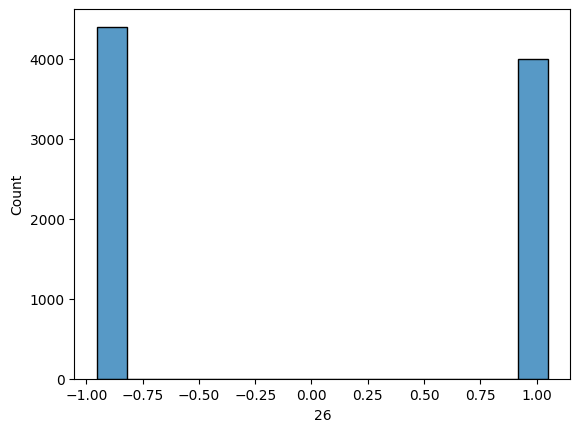

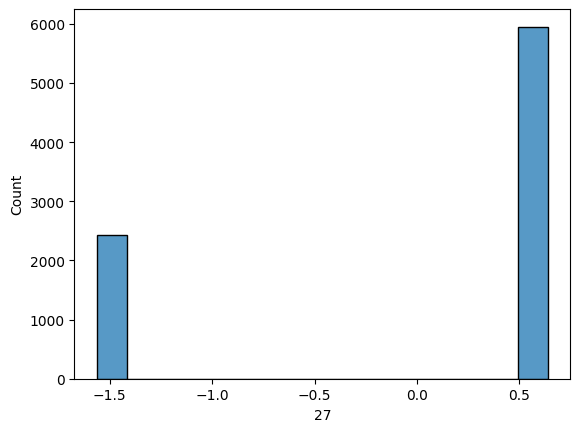

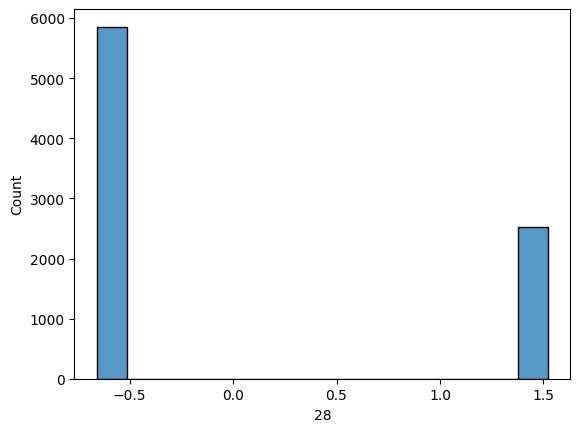

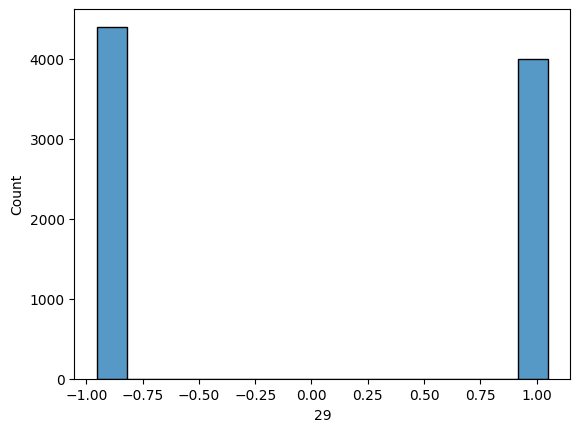

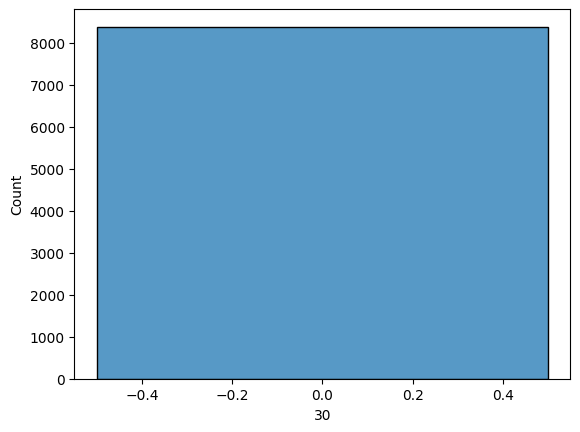

In [32]:
for i in transformed.columns:
    sns.histplot(data=transformed, x = i)
    plt.show()

# skewness after applying transformtion 

In [33]:
transformed.skew()

0    -0.275222
1     0.000000
2    -3.243650
3    -2.678618
4     0.253818
5    -0.631695
6    -0.005568
7    -0.272456
8     0.198857
9    -0.318300
10   -0.301873
11   -0.275329
12   -0.370299
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17   -2.265517
18    2.265517
19    0.997588
20   -0.997588
21    0.000000
22    0.000000
23    0.000000
24   -0.923356
25    0.863819
26    0.097187
27   -0.923356
28    0.863819
29    0.097187
30    0.000000
dtype: float64

# problem of skew is close to be solved but still problem of skewness exists in dataset need to be solved 

# Kurtosis 

In [34]:
transformed.kurtosis()

0     -1.546081
1      0.000000
2     11.069903
3      5.719810
4     -1.627826
5     -0.946760
6     -0.962359
7     -1.017994
8      5.515855
9     -0.950649
10    -0.972430
11    -0.946458
12    -1.186794
13     0.000000
14     0.000000
15     0.000000
16     0.000000
17     3.133312
18     3.133312
19    -1.005059
20    -1.005059
21     0.000000
22     0.000000
23     0.000000
24    -1.147687
25    -1.254116
26    -1.991030
27    -1.147687
28    -1.254116
29    -1.991030
30     0.000000
dtype: float64

# in 5 columns, extreme value(Outliers) exist
# If the kurtosis value is between -2 and +2, the distribution can be considered approximately close to normal

# Multicollinearity check

In [208]:
matrix = transformed.corr()

for i in range(len(matrix)):
    for a in range(i):
        if abs(matrix[i][a]) > 0.70:
            print(i)
        

6
11
18
20
25
27
27
28
28
28
29


In [198]:
transformed1 = transformed.drop([5,11,18,20,25,27,28,29], axis=1)

<Axes: >

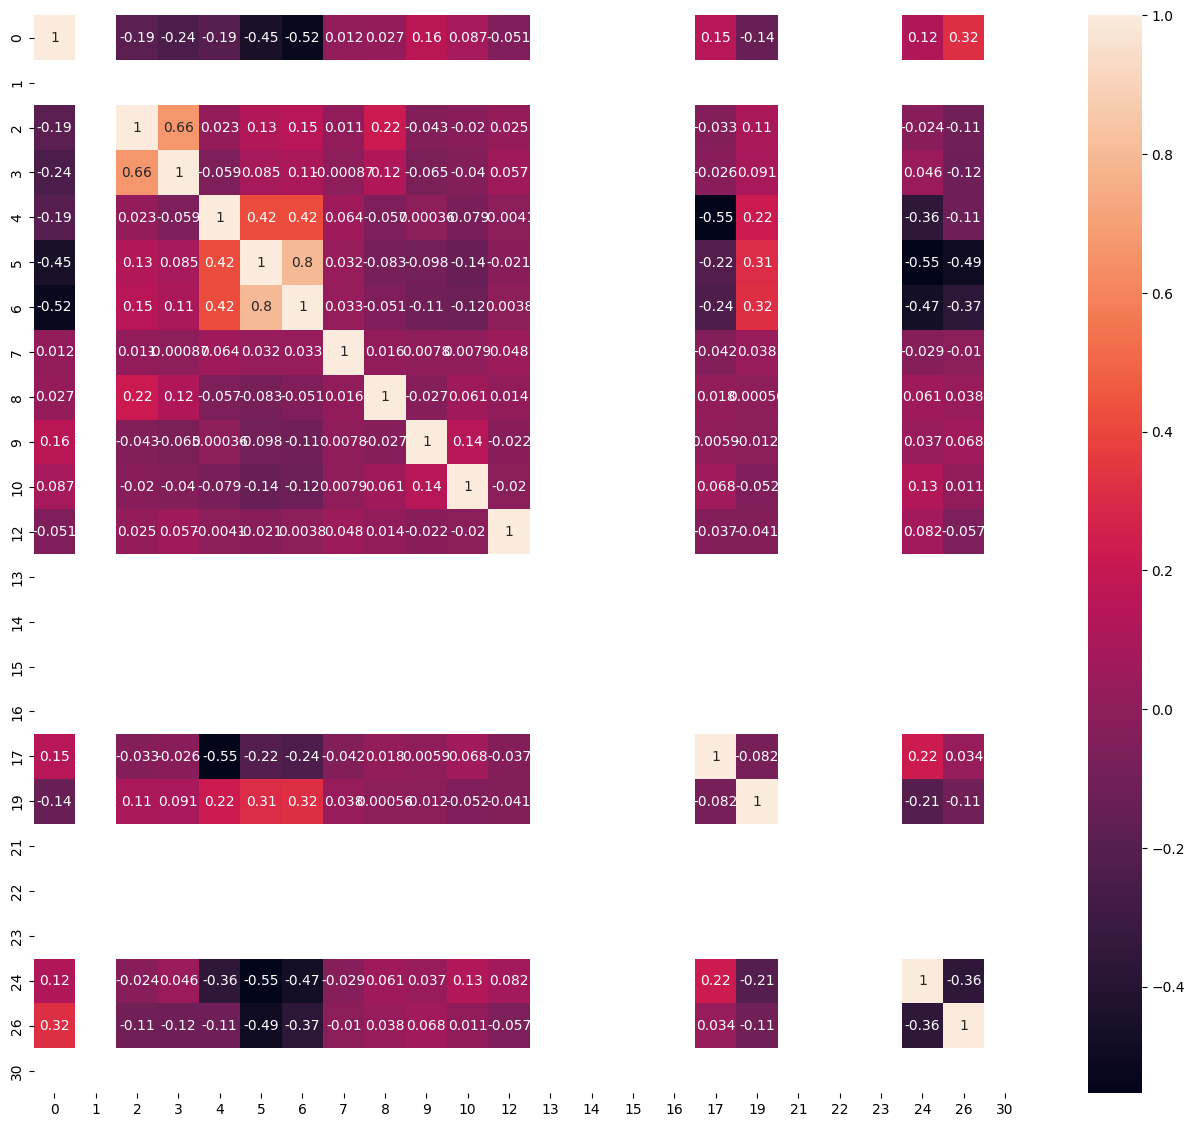

In [168]:
plt.figure(figsize=(16,14))
sns.heatmap(transformed1.corr(), annot=True)

# StandardScaler

In [201]:
from sklearn.preprocessing import StandardScaler

In [202]:
st = StandardScaler()

In [203]:
x_scaled = pd.DataFrame(st.fit_transform(transformed1))

# Model Building 

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [205]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)

In [206]:
models = {'Linear' : LinearRegression(), 'SVR' : SVR(), 'DecisionTreeRegressor' : DecisionTreeRegressor(), 'RandomForestRegressor': RandomForestRegressor(), 'AdaBoostRegressor': AdaBoostRegressor(), 'GradientBoostingRegressor': GradientBoostingRegressor(), 'ElasticNet': ElasticNet(), 'Ridge': Ridge(), 'Lasso': Lasso()}

In [207]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    print(',,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,')
    print(model_name)
    print('accuracy_score', r2_score(y_train, y_pred_train)*100)
    print('accuracy_score', r2_score(y_test, y_pred_test)*100)
    print('..........................................')
    print('mean_squared_error', mean_squared_error(y_train, y_pred_train))
    print('mean_squared_error', mean_squared_error(y_test, y_pred_test))
    print('...............................................')
    

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Linear
accuracy_score 78.67792818457093
accuracy_score 78.10109901657903
..........................................
mean_squared_error 0.15040581299283284
mean_squared_error 0.15103487813158656
...............................................
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SVR
accuracy_score 92.92773488282319
accuracy_score 89.2410290569876
..........................................
mean_squared_error 0.04988773107311784
mean_squared_error 0.07420371763995756
...............................................
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DecisionTreeRegressor
accuracy_score 100.0
accuracy_score 98.40971678180567
..........................................
mean_squared_error 0.0
mean_squared_error 0.010968049594659036
...............................................
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
RandomForestRegressor
accuracy_score 99.86709379339291
accuracy_score 98.96080523110889
..........

In [210]:
for model_name, model in models.items():
    train_scores = cross_val_score(model, x_train, y_train, cv=5)
    test_scores = cross_val_score(model, x_test, y_test, cv=5)
    print(model_name)
    print('Train Scores:', train_scores.mean())
    print('Test Scores:', test_scores.mean())

Linear
Train Scores: 0.784419317550098
Test Scores: 0.7780027963089255
SVR
Train Scores: 0.8902991831767764
Test Scores: 0.8632763577626861
DecisionTreeRegressor
Train Scores: 0.9833221613949682
Test Scores: 0.9687335952896037
RandomForestRegressor
Train Scores: 0.988505961914384
Test Scores: 0.98044204474939
AdaBoostRegressor
Train Scores: 0.9712177816762775
Test Scores: 0.9671798281567682
GradientBoostingRegressor
Train Scores: 0.9879271416293506
Test Scores: 0.9799109218137534
ElasticNet
Train Scores: 0.2851420521282635
Test Scores: 0.26685423885599874
Ridge
Train Scores: 0.7844199162218674
Test Scores: 0.7780137162057433
Lasso
Train Scores: -0.002382743625917838
Test Scores: -0.0014548264425083613


# Best Model

# Gradient Boosting model

In [211]:
gd1 = GradientBoostingRegressor()

In [217]:
max_train = 0.0
min_test = 0.0
random_state = 0.0
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=i)
    gd1.fit(x_train, y_train)
    y_predtrains = gd1.predict(x_train)
    y_predtests = gd1.predict(x_test)
    accuracy_score_train = r2_score(y_train, y_predtrains)
    accuracy_score_test = r2_score(y_test, y_predtests)
    if accuracy_score_train > max_train and accuracy_score_test > min_test:
        max_train = accuracy_score_train
        min_test = accuracy_score_test
        random_state = i

In [218]:
max_train

0.9939476565506374

In [219]:
min_test

0.9897869169413579

In [220]:
random_state

24

In [221]:
x_train0, x_test0, y_train0, y_test0 = train_test_split(x_scaled, y, test_size=0.25, random_state= 24)

In [222]:
gd2 = GradientBoostingRegressor(max_depth=3)

In [223]:
gd2.fit(x_train0, y_train0)
y_predtrains1 = gd2.predict(x_train0)
y_predtests1 = gd2.predict(x_test0)

In [224]:
accuracy_score_train1 = r2_score(y_train0, y_predtrains1)
accuracy_score_test1 = r2_score(y_test0, y_predtests1)
print('train', accuracy_score_train1, 'test', accuracy_score_test1)

train 0.9939476565506374 test 0.9898103225095559


# Cross Validation Score

In [225]:
train_scores1 = cross_val_score(gd2, x_train0, y_train0, cv=5)
test_scores1 = cross_val_score(gd2, x_test0, y_test0, cv=5)

print('Train Scores:', train_scores1.mean(), 'Test Scores:', test_scores1.mean())


Train Scores: 0.9878160800744415 Test Scores: 0.9772495137022139


# Hyperparameter Tuning

In [226]:
gd3 = GradientBoostingRegressor()

In [227]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [228]:
from sklearn.model_selection import RandomizedSearchCV

In [229]:
rscv = RandomizedSearchCV(gd3, param_distributions = param_grid, cv=5)

In [230]:
rscv.fit(x_scaled, y)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 5, 7],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8],
                                        'n_estimators': [50, 100, 200]})

In [231]:
best_params = rscv.best_params_
best_score = rscv.best_score_

In [232]:
print(best_params)

{'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.1}


In [233]:
print(best_score)

0.9543078956745085


# After Applying Hyperparameter Tuning 

In [234]:
gd4 = GradientBoostingRegressor(n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features='log2', max_depth=5, learning_rate=0.1)

In [235]:
gd4.fit(x_train0, y_train0)
y_predtrains5 = gd2.predict(x_train0)
y_predtests5 = gd2.predict(x_test0)

In [236]:
accuracy_score_train5 = r2_score(y_train0, y_predtrains5)
accuracy_score_test5 = r2_score(y_test0, y_predtests5)
print('train', accuracy_score_train5, 'test', accuracy_score_test5)

train 0.9939476565506374 test 0.9898103225095559


# cross_val_score

In [237]:
train_scores1 = cross_val_score(gd4, x_train0, y_train0, cv=5)
test_scores1 = cross_val_score(gd4, x_test0, y_test0, cv=5)

print('Train Scores:', train_scores1.mean(), 'Test Scores:', test_scores1.mean())


Train Scores: 0.9822258544872335 Test Scores: 0.9683450502521541


In [ ]:
# resuduals

In [238]:
residuals = y_predtrains5 - y_train0


C:\Users\ravin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Price range', ylabel='Density'>

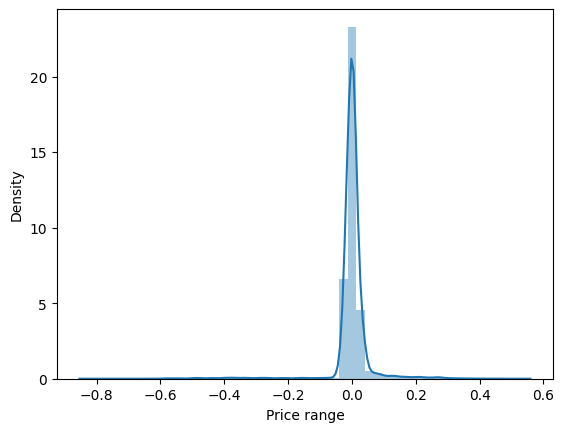

In [239]:
sns.distplot(residuals)

# Price range prediction

In [53]:
df1 = df.reset_index()
df2 = df1.drop(['index'], axis=1)

In [54]:
x = df2.drop(['Price range'], axis=1)
y = df2['Price range']

In [55]:
x

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Aggregate rating,Votes,Restaurant Name,City,Address,...,Is delivering now_0,Is delivering now_1,Switch to order menu_0,Rating color_0,Rating color_1,Rating color_2,Rating text_0,Rating text_1,Rating text_2,Country
0,2500023,1.0,75.346017,19.876219,800.0,3.6,240.0,3585,11.0,1097,...,0.0,1.0,1,0,1,1,0,1,1,3.0
1,2500076,1.0,0.000000,0.000000,850.0,3.3,65.0,617,11.0,7535,...,0.0,1.0,1,1,0,0,1,0,0,3.0
2,2500054,1.0,75.353942,19.874733,600.0,3.3,63.0,354,11.0,7516,...,0.0,1.0,1,1,0,0,1,0,0,3.0
3,2500134,1.0,75.340775,19.876106,700.0,3.1,19.0,2099,11.0,2896,...,0.0,1.0,1,1,0,0,1,0,0,3.0
4,2500069,1.0,75.367127,19.875522,350.0,3.4,46.0,3010,11.0,5302,...,0.0,1.0,1,1,0,0,1,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8382,2800100,1.0,83.361377,17.764287,600.0,3.6,193.0,1834,134.0,3885,...,0.0,1.0,1,0,1,1,0,1,1,3.0
8383,2800418,1.0,0.000000,0.000000,400.0,3.7,85.0,3364,134.0,7066,...,0.0,1.0,1,0,1,1,0,1,1,3.0
8384,2800881,1.0,83.315281,17.719539,600.0,4.3,172.0,4988,134.0,7009,...,0.0,1.0,1,0,1,0,0,1,0,3.0
8385,2800042,1.0,83.336840,17.721182,1500.0,3.8,74.0,7201,134.0,8664,...,0.0,1.0,1,0,1,1,0,1,1,3.0


# Relationship between input and y

In [251]:
import seaborn as sns 

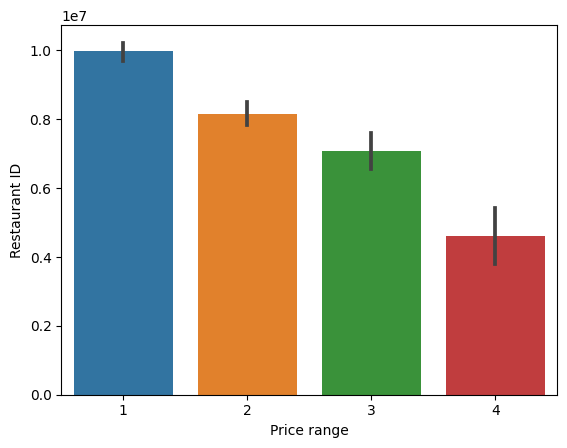

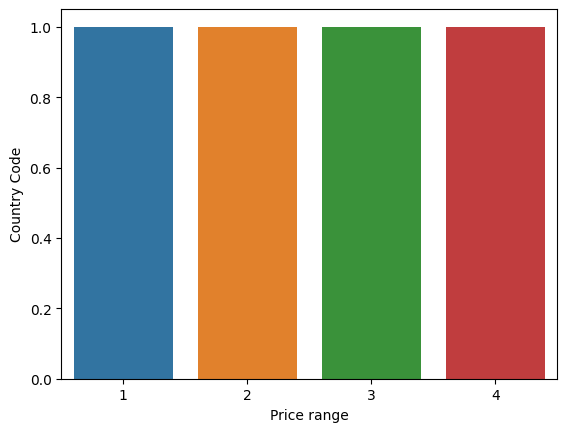

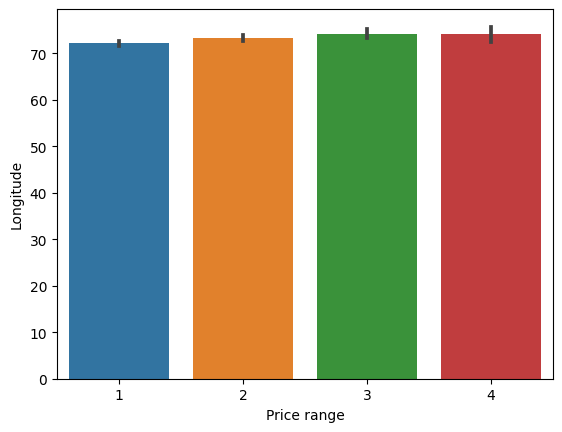

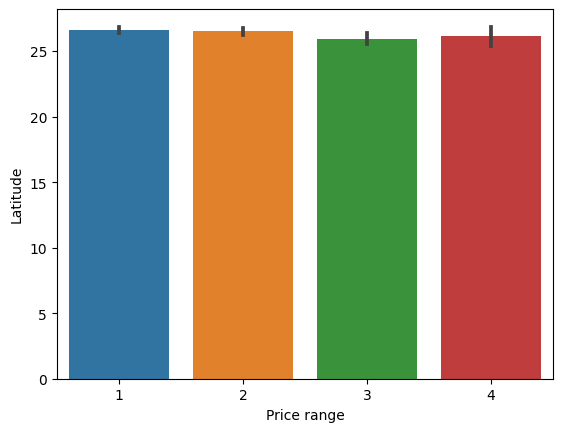

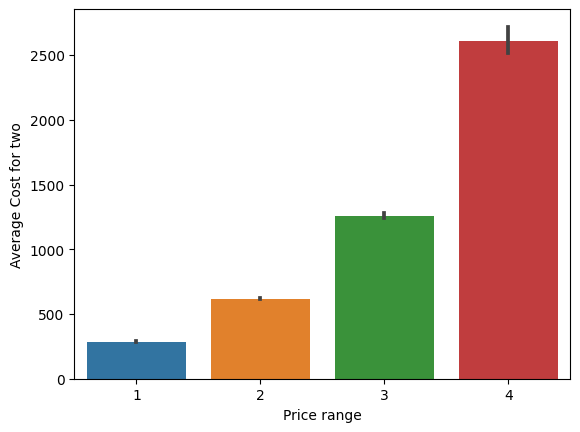

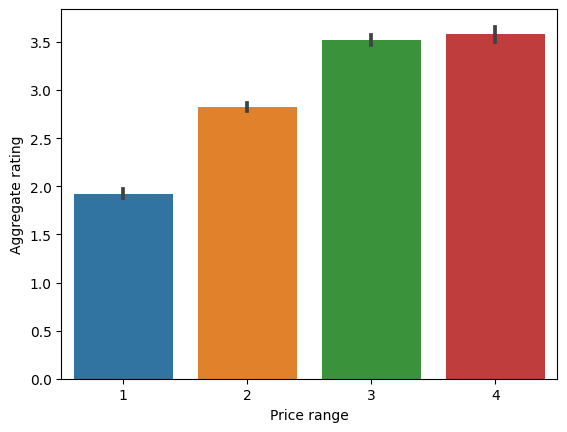

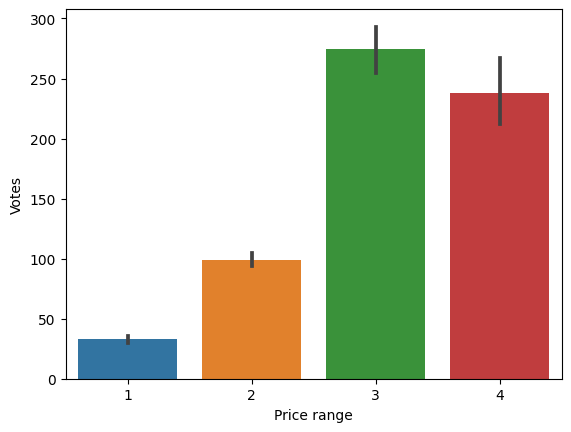

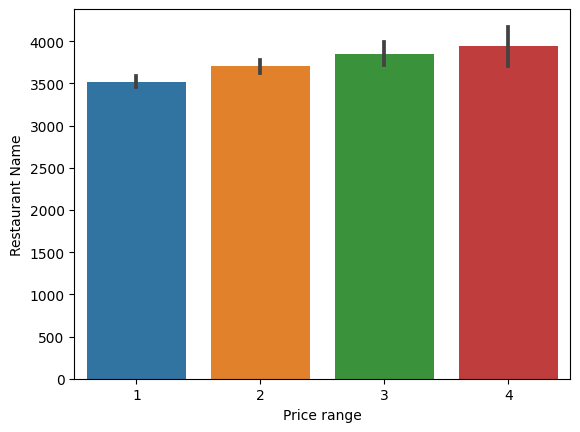

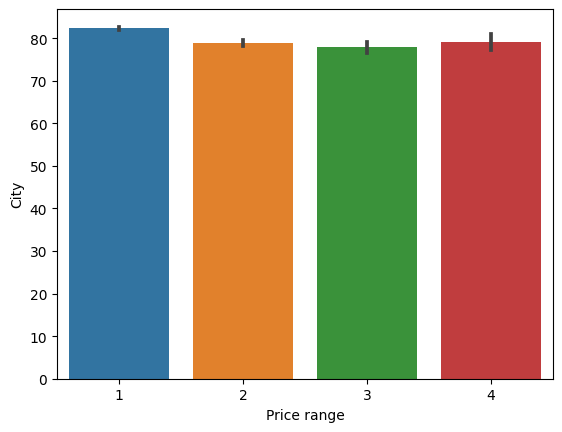

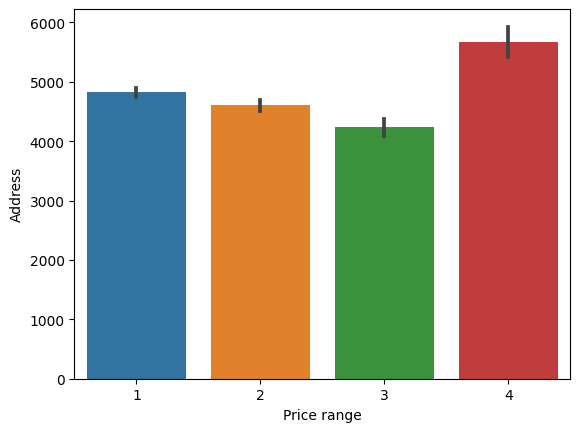

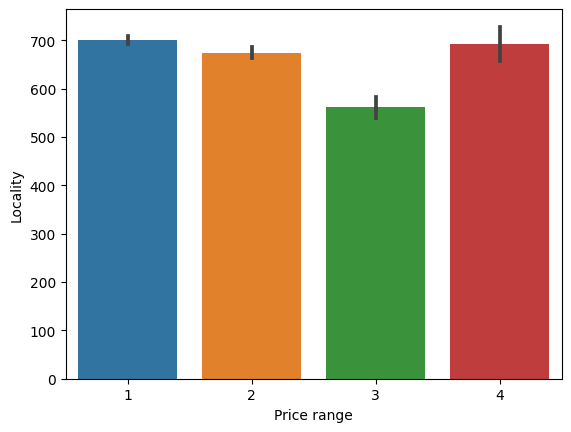

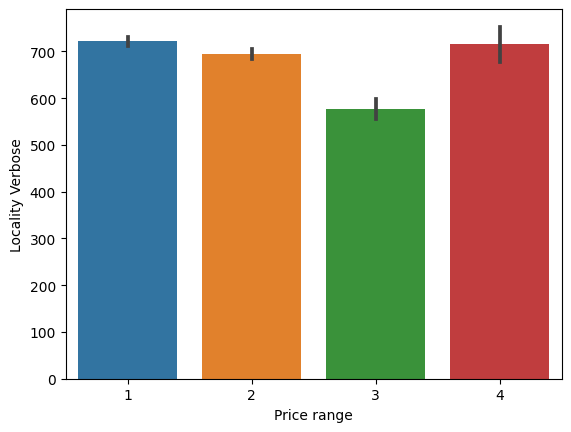

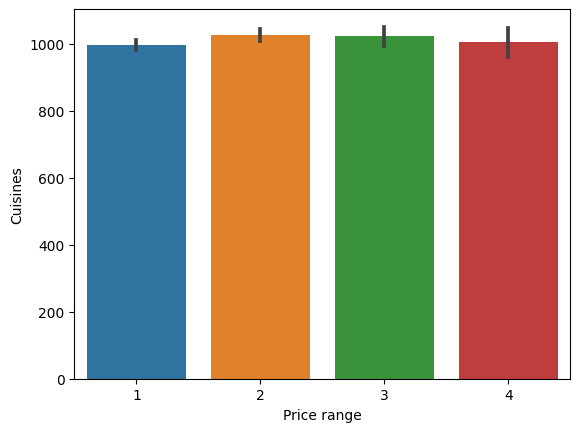

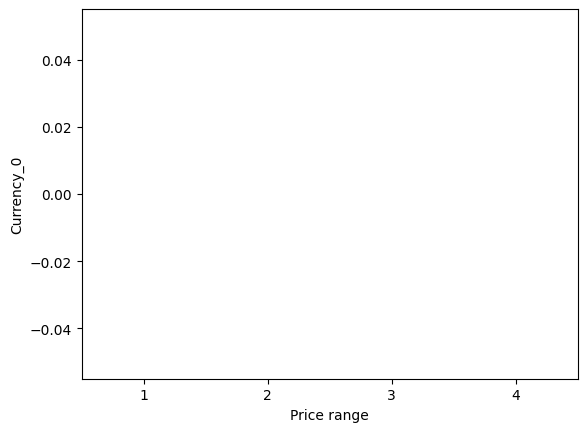

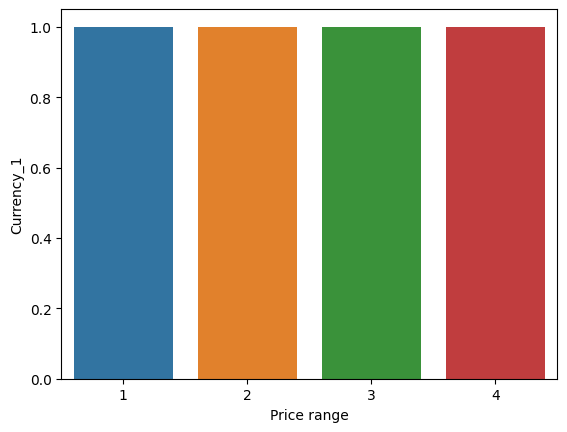

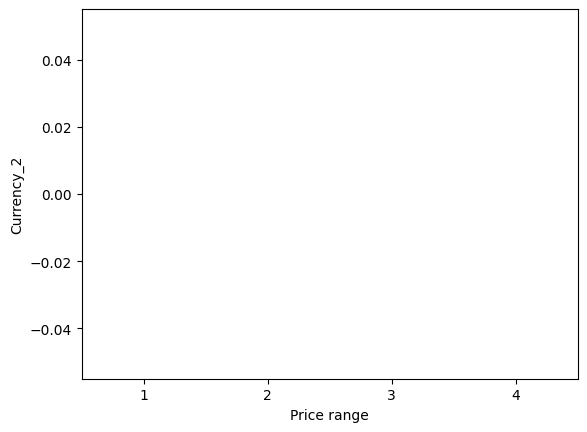

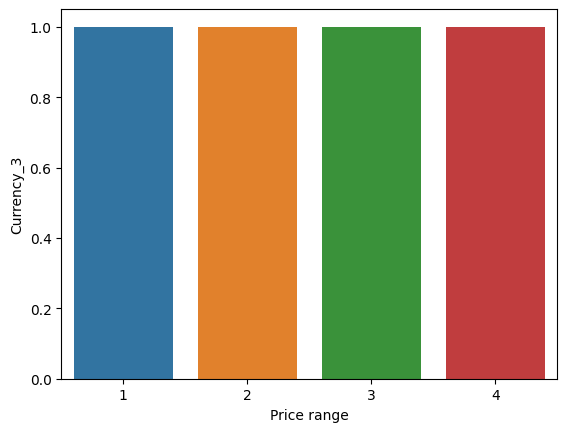

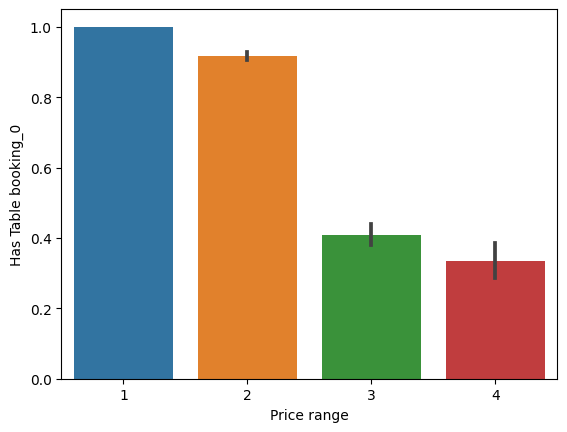

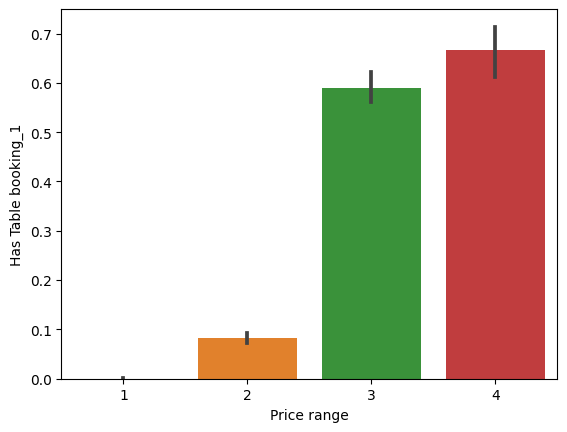

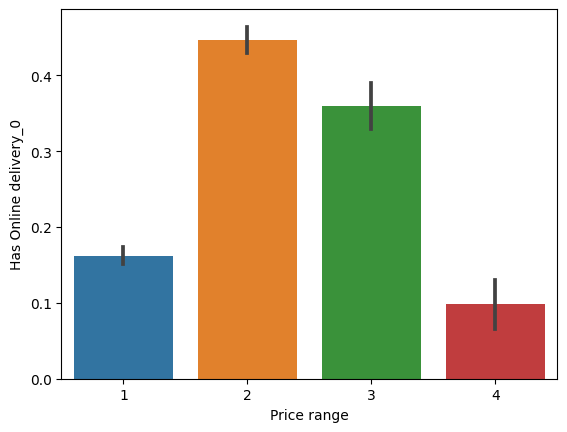

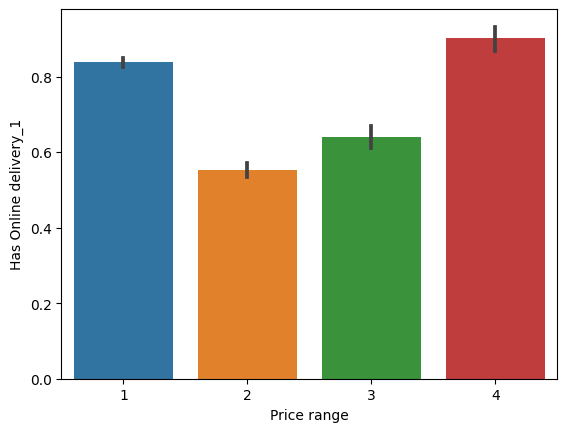

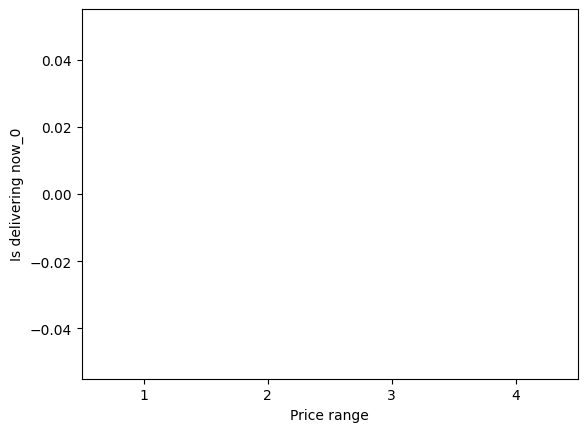

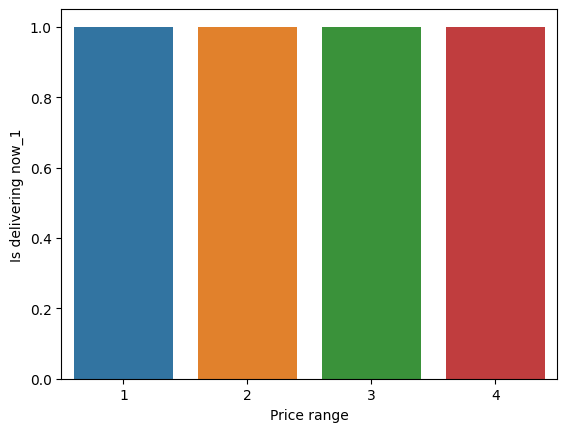

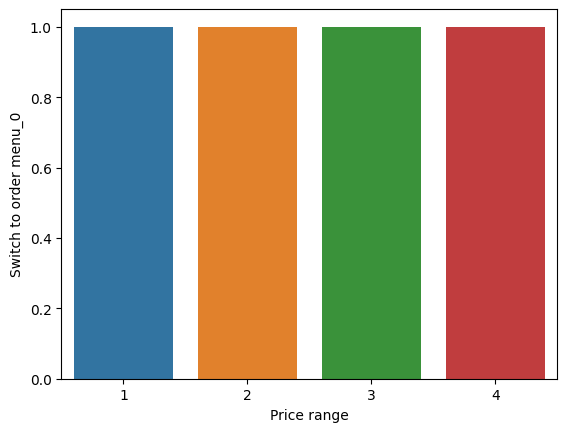

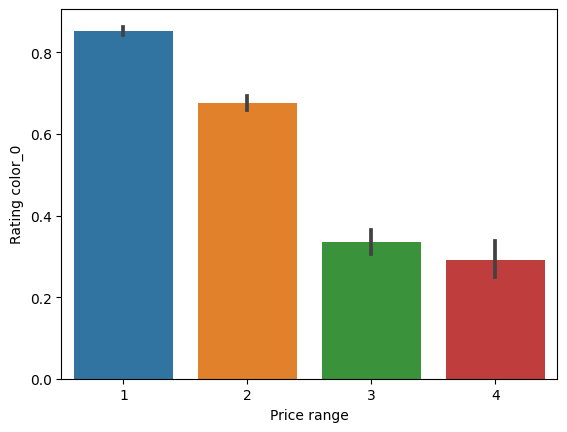

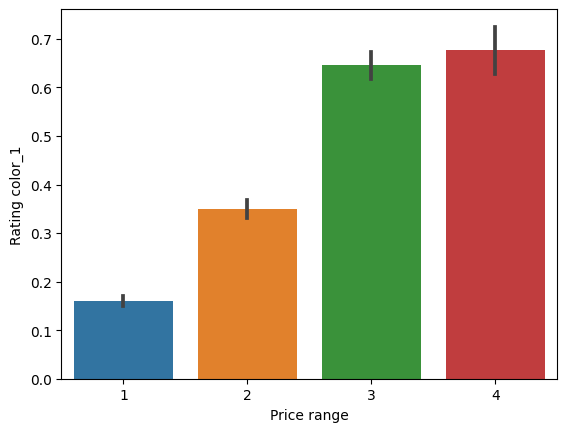

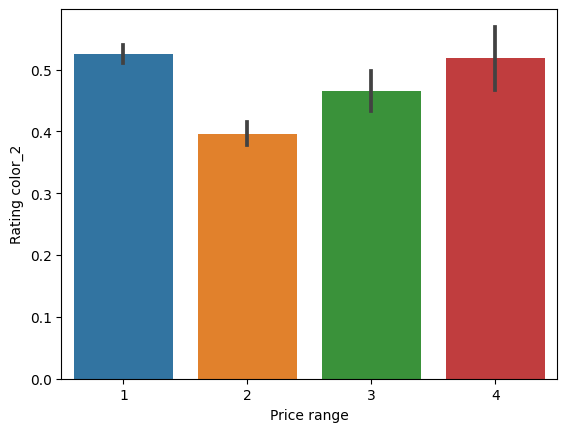

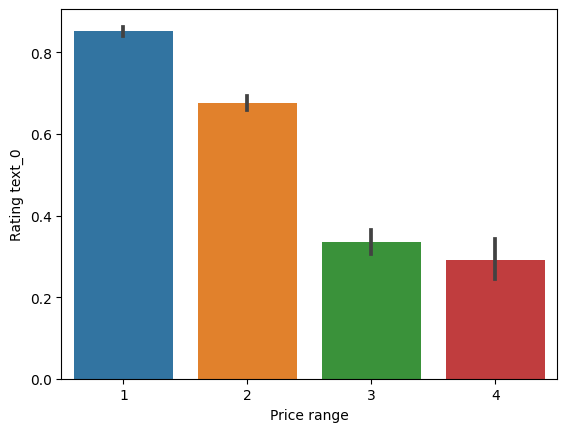

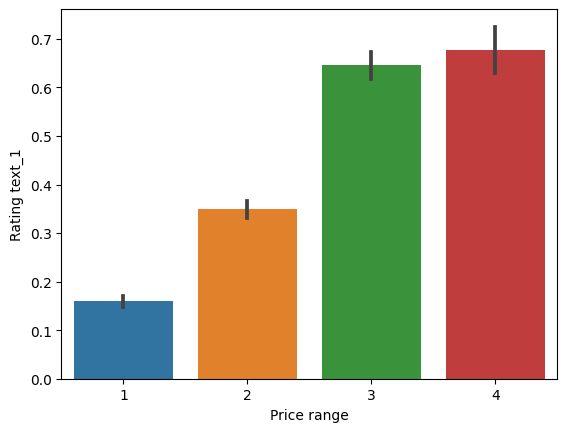

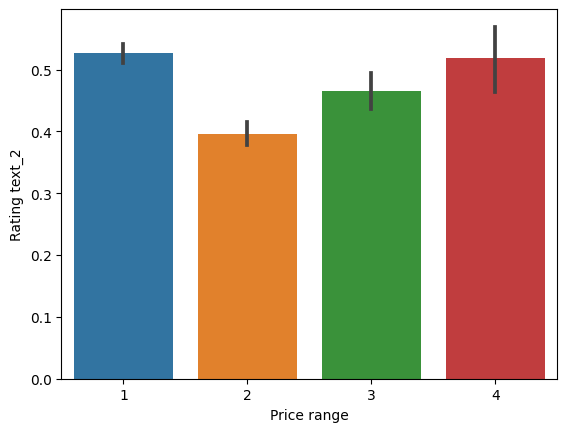

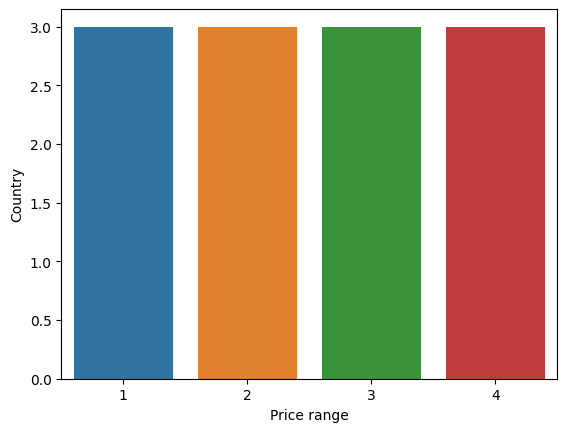

In [253]:
for i in x.columns:
    
    sns.barplot(data=x, y=i, x=y)
    plt.show()

# in some columns, there is no pattern in data 
# but in some cases, there is linear relationship and non linear relationship exist in input and output varible 

# Transformer

In [56]:
qt = QuantileTransformer(output_distribution='normal')

In [57]:
transformed = pd.DataFrame(qt.fit_transform(x))

In [58]:
transformed

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.001255,-5.199338,-1.477807,-1.404888,0.877196,0.791884,1.244778,0.003997,-5.199338,-1.263842,...,-5.199338,-5.199338,-5.199338,-5.199338,5.199338,5.199338,-5.199338,5.199338,5.199338,-5.199338
1,-0.000469,-5.199338,-5.199338,-5.199338,0.963423,0.324254,0.487893,-1.402950,-5.199338,0.953092,...,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338
2,-0.001241,-5.199338,-1.476336,-1.409498,0.461215,0.324254,0.475214,-1.674849,-5.199338,0.941293,...,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338
3,0.001255,-5.199338,-1.478781,-1.405241,0.703922,0.022584,-0.067799,-0.535083,-5.199338,-0.602825,...,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338
4,-0.000715,-5.199338,-1.475139,-1.407047,-0.387078,0.473810,0.328223,-0.192393,-5.199338,0.148998,...,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8382,0.016316,-5.199338,2.358209,-1.438668,0.461215,0.791884,1.113220,-0.645295,5.199338,-0.296389,...,-5.199338,-5.199338,-5.199338,-5.199338,5.199338,5.199338,-5.199338,5.199338,5.199338,-5.199338
8383,0.017308,-5.199338,-5.199338,-5.199338,-0.186756,0.955471,0.631785,-0.084366,5.199338,0.745372,...,-5.199338,-5.199338,-5.199338,-5.199338,5.199338,5.199338,-5.199338,5.199338,5.199338,-5.199338
8384,0.018752,-5.199338,2.326187,-1.439237,0.461215,2.033104,1.039636,0.481300,5.199338,0.723919,...,-5.199338,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338
8385,0.016308,-5.199338,2.340865,-1.439179,1.497997,1.128144,0.556927,1.834772,5.199338,1.848216,...,-5.199338,-5.199338,-5.199338,-5.199338,5.199338,5.199338,-5.199338,5.199338,5.199338,-5.199338


# Skewness check

In [59]:
transformed.skew()

0     0.006762
1     0.000000
2    -1.823229
3    -1.825365
4    -0.002790
5    -0.888953
6    -1.532840
7    -0.001933
8    -0.080456
9     0.008815
10   -0.001924
11   -0.002089
12   -0.036311
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17   -2.265517
18    2.265517
19    0.997588
20   -0.997588
21    0.000000
22    0.000000
23    0.000000
24   -0.923356
25    0.863819
26    0.097187
27   -0.923356
28    0.863819
29    0.097187
30    0.000000
dtype: float64

# Kurtosis check

In [60]:
transformed.kurtosis()

0     0.156741
1     0.000000
2     4.457168
3     4.464327
4     0.269759
5    -0.816539
6     1.474797
7     0.103783
8     4.333919
9     0.182667
10    0.207174
11    0.207160
12    0.286487
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    3.133312
18    3.133312
19   -1.005059
20   -1.005059
21    0.000000
22    0.000000
23    0.000000
24   -1.147687
25   -1.254116
26   -1.991030
27   -1.147687
28   -1.254116
29   -1.991030
30    0.000000
dtype: float64

# RobustScaler

In [61]:
from sklearn.preprocessing import RobustScaler

In [62]:
scaler = RobustScaler()

In [63]:
x_scaled = pd.DataFrame(scaler.fit_transform(transformed))

In [64]:
x_scaled

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.000557,0.0,-1.094881,-1.041139,0.675184,0.131965,0.909921,0.002745,-5.280975,-0.936792,...,0.0,0.0,0.0,-1.0,1.0,1.0,-1.0,1.0,1.0,0.0
1,0.000026,0.0,-3.852188,-3.853067,0.740711,0.051748,0.360521,-1.041749,-5.280975,0.706494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.000546,0.0,-1.093791,-1.044556,0.359070,0.051748,0.351318,-1.243602,-5.280975,0.697748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001305,0.0,-1.095603,-1.041400,0.543509,0.000000,-0.042838,-0.397459,-5.280975,-0.446818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.000156,0.0,-1.092904,-1.042739,-0.285570,0.077403,0.244622,-0.143051,-5.280975,0.110465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8382,0.012476,0.0,1.747248,-1.066172,0.359070,0.131965,0.814427,-0.479279,5.117700,-0.219675,...,0.0,0.0,0.0,-1.0,1.0,1.0,-1.0,1.0,1.0,0.0
8383,0.013212,0.0,-3.852188,-3.853067,-0.133340,0.160026,0.464968,-0.062854,5.117700,0.552523,...,0.0,0.0,0.0,-1.0,1.0,1.0,-1.0,1.0,1.0,0.0
8384,0.014283,0.0,1.723523,-1.066594,0.359070,0.344882,0.761014,0.357087,5.117700,0.536621,...,0.0,0.0,0.0,-1.0,1.0,0.0,-1.0,1.0,0.0,0.0
8385,0.012471,0.0,1.734398,-1.066551,1.146947,0.189646,0.410630,1.361883,5.117700,1.369998,...,0.0,0.0,0.0,-1.0,1.0,1.0,-1.0,1.0,1.0,0.0


# multicollinearity problem

<Axes: >

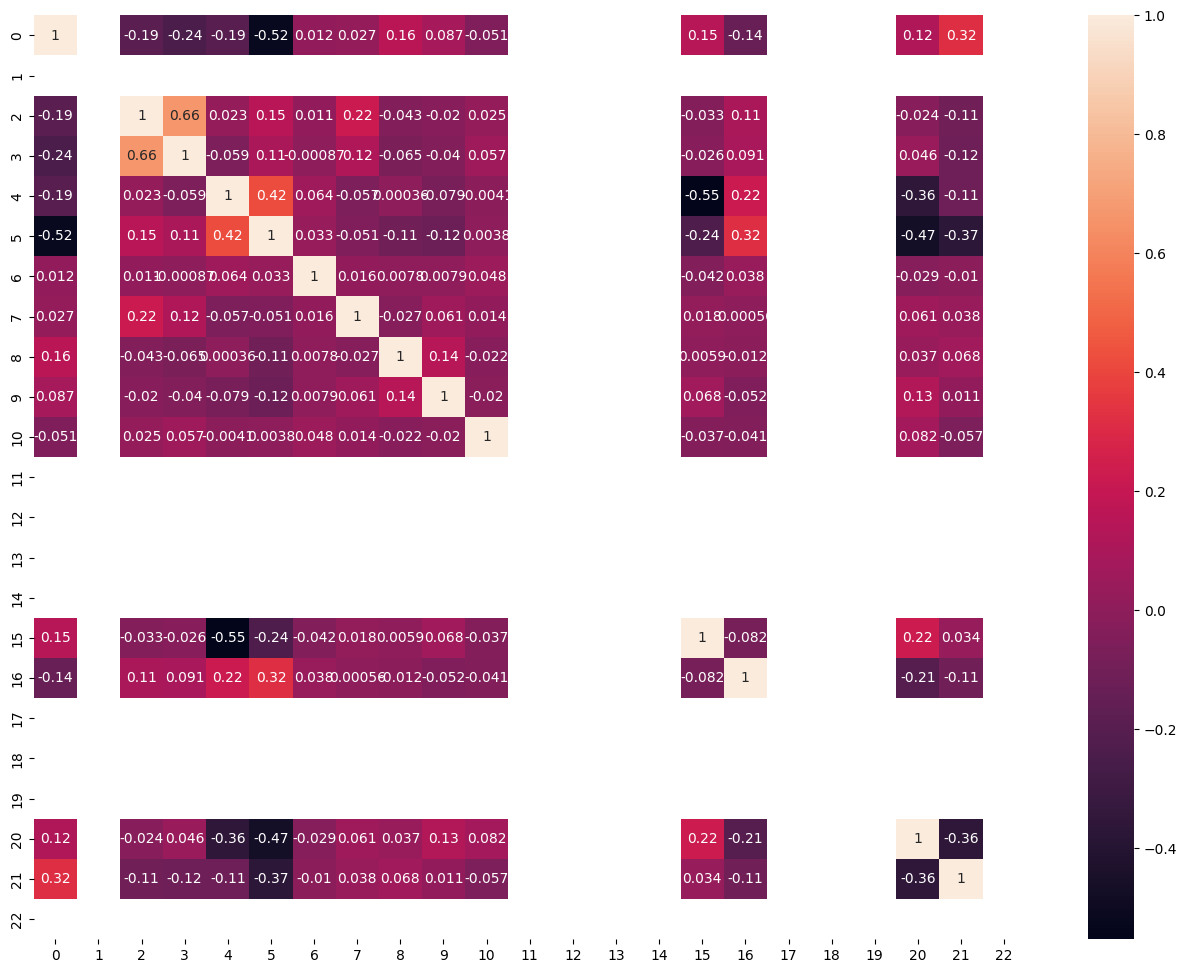

In [241]:
plt.figure(figsize=(16,12))
sns.heatmap(x_scaled.corr(), annot=True)

# Model Building 

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

In [72]:
x_train60, x_test60, y_train60, y_test60 = train_test_split(x_scaled, y, test_size=0.25, random_state=42)

In [67]:
models = {
    'Logistic': LogisticRegression(multi_class='ovr'),
    'SVC': SVC(decision_function_shape='ovr'),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

In [68]:
for model_name, model in models.items():
    model.fit(x_train60, y_train60)
    y_pred_train0 = model.predict(x_train60)
    y_pred_test0 = model.predict(x_test60)
    print(',,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,')
    print(model_name)
    print('accuracy_score', accuracy_score(y_train60, y_pred_train0))
    print('accuracy_score', accuracy_score(y_test60, y_pred_test0))
    print('..........................................')
    print('confusion_matrix_train')
    print(confusion_matrix(y_train60, y_pred_train0))
    print('confusion_matrix on test')
    print(confusion_matrix(y_test60, y_pred_test0))
    print('..................................')
    print(classification_report(y_train60, y_pred_train0))
    print('...............................')

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Logistic
accuracy_score 0.8965023847376788
accuracy_score 0.8917501192179303
..........................................
confusion_matrix_train
[[3183   27    0    0]
 [  48 1876  151    0]
 [   0  308  421    4]
 [   0   55   58  159]]
confusion_matrix on test
[[1051    8    0    0]
 [  16  625   58    0]
 [   0  117  141    0]
 [   0   17   11   53]]
..................................
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      3210
           2       0.83      0.90      0.86      2075
           3       0.67      0.57      0.62       733
           4       0.98      0.58      0.73       272

    accuracy                           0.90      6290
   macro avg       0.86      0.76      0.80      6290
weighted avg       0.90      0.90      0.89      6290

...............................
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SVC
accuracy_score 0.9209856915739268
accuracy_s

C:\Users\ravin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ravin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ravin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GradientBoostingClassifier
accuracy_score 0.9993640699523052
accuracy_score 0.9899856938483548
..........................................
confusion_matrix_train
[[3210    0    0    0]
 [   1 2074    0    0]
 [   0    1  732    0]
 [   0    0    2  270]]
confusion_matrix on test
[[1059    0    0    0]
 [   4  692    3    0]
 [   0   11  247    0]
 [   0    0    3   78]]
..................................
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3210
           2       1.00      1.00      1.00      2075
           3       1.00      1.00      1.00       733
           4       1.00      0.99      1.00       272

    accuracy                           1.00      6290
   macro avg       1.00      1.00      1.00      6290
weighted avg       1.00      1.00      1.00      6290

...............................


In [69]:
for model_name, model in models.items():
    train_scores = cross_val_score(model, x_train60, y_train60, cv=5)
    test_scores = cross_val_score(model, x_test60, y_test60, cv=5)
    print(model_name)
    print('Train Scores:', train_scores.mean())
    print('Test Scores:', test_scores.mean())

C:\Users\ravin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic
Train Scores: 0.8939586645469
Test Scores: 0.8793726559836343
SVC
Train Scores: 0.9052464228934817
Test Scores: 0.8602886691669509
DecisionTreeClassifier
Train Scores: 0.9883942766295707
Test Scores: 0.9775838163427663
RandomForestClassifier
Train Scores: 0.9767885532591414
Test Scores: 0.9613831117172407
GaussianNB
Train Scores: 0.7095389507154213
Test Scores: 0.5851267189453347
AdaBoostClassifier
Train Scores: 0.4375198728139904
Test Scores: 0.4453960677349699


KeyboardInterrupt: 

# Best Model 

In [78]:
 dt = DecisionTreeClassifier(max_depth=7)

In [79]:
dt.fit(x_train60, y_train60)
y_pred_train0 = dt.predict(x_train60)
y_pred_test0 = dt.predict(x_test60)
print(',,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,')

print('accuracy_score', accuracy_score(y_train60, y_pred_train0))
print('accuracy_score', accuracy_score(y_test60, y_pred_test0))
print('..........................................')
print('confusion_matrix_train')
print(confusion_matrix(y_train60, y_pred_train0))
print('confusion_matrix on test')
print(confusion_matrix(y_test60, y_pred_test0))
print('..................................')
print(classification_report(y_train60, y_pred_train0))
print('.............................')

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
accuracy_score 0.9965023847376788
accuracy_score 0.9885550786838341
..........................................
confusion_matrix_train
[[3210    0    0    0]
 [   2 2071    2    0]
 [   0    5  724    4]
 [   0    0    9  263]]
confusion_matrix on test
[[1057    2    0    0]
 [   5  687    7    0]
 [   0    7  250    1]
 [   0    0    2   79]]
..................................
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3210
           2       1.00      1.00      1.00      2075
           3       0.99      0.99      0.99       733
           4       0.99      0.97      0.98       272

    accuracy                           1.00      6290
   macro avg       0.99      0.99      0.99      6290
weighted avg       1.00      1.00      1.00      6290

.............................


# Cross Validation score

In [81]:
train_scores = cross_val_score(dt, x_train60, y_train60, cv=5)
test_scores = cross_val_score(dt, x_test60, y_test60, cv=5)
print(model_name)
print('Train Scores:', train_scores.mean(), 'Test Scores:', test_scores.mean())


GradientBoostingClassifier
Train Scores: 0.9885532591414945 Test Scores: 0.9775826798499828


# hyperparameter tuning 

In [91]:
dt1 = DecisionTreeClassifier()

In [103]:
param_grid1 = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [104]:
from sklearn.model_selection import RandomizedSearchCV

In [105]:
rscv1 = RandomizedSearchCV(dt1, param_distributions = param_grid1, cv=5)

In [106]:
rscv1.fit(x_scaled, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8],
                                        'splitter': ['best', 'random']})

In [109]:
best_params = rscv1.best_params_
best_score = rscv1.best_score_

In [110]:
print(best_params)

{'splitter': 'best', 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'criterion': 'entropy'}


# After Applying Hyperparameter Tuning 

In [111]:
dt2 = DecisionTreeClassifier(splitter='best', min_samples_split=4, min_samples_leaf=1, max_features=None, max_depth=None, criterion='entropy')

In [112]:
dt2.fit(x_train60, y_train60)
y_pred_train4 = dt2.predict(x_train60)
y_pred_test4 = dt2.predict(x_test60)
print(',,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,')

print('accuracy_score', accuracy_score(y_train60, y_pred_train4))
print('accuracy_score', accuracy_score(y_test60, y_pred_test4))
print('..........................................')
print('confusion_matrix_train')
print(confusion_matrix(y_train60, y_pred_train4))
print('confusion_matrix on test')
print(confusion_matrix(y_test60, y_pred_test4))
print('..................................')
print(classification_report(y_train60, y_pred_train4))
print('.............................')

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
accuracy_score 0.9995230524642289
accuracy_score 0.9928469241773963
..........................................
confusion_matrix_train
[[3210    0    0    0]
 [   0 2075    0    0]
 [   0    1  731    1]
 [   0    0    1  271]]
confusion_matrix on test
[[1058    1    0    0]
 [   2  691    6    0]
 [   0    3  253    2]
 [   0    0    1   80]]
..................................
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3210
           2       1.00      1.00      1.00      2075
           3       1.00      1.00      1.00       733
           4       1.00      1.00      1.00       272

    accuracy                           1.00      6290
   macro avg       1.00      1.00      1.00      6290
weighted avg       1.00      1.00      1.00      6290

.............................


# Cross Validation

In [113]:
train_scores = cross_val_score(dt2, x_train60, y_train60, cv=5)
test_scores = cross_val_score(dt2, x_test60, y_test60, cv=5)

print('Train Scores:', train_scores.mean(), 'Test Scores:', test_scores.mean())


Train Scores: 0.9872813990461051 Test Scores: 0.9747232640072735
